##Data Preparation and Preprocessing

In [ ]:
# -----------------------------------
# 1. Imports
# -----------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# -----------------------------------
# 2. Load the Dataset
# -----------------------------------

df = pd.read_csv('/content/Dataset_semiconductor_defectlevels_v1.csv')

# -----------------------------------
# 3. Subset: Only Keep Rows with HSE Defect Level Available
# -----------------------------------
df = df.dropna(subset=['hse defect level (relative to VBM)_[eV]'])

print(f"Dataset after filtering: {df.shape[0]} rows")

# -----------------------------------
# 4. Feature Selection
# -----------------------------------
# Selected Features (Physics-informed + Practical)
selected_features = [
    'pbe defect level (relative to VBM)_[eV]',
    'host bandgap_[eV]',
    'host lattice constant_[Ang.]',
    'host_epsilon',
    'charge_from',
    'charge_to',
    'is_interstitial',
    'is_a_latt',
    'is_b_latt'
]

# Target
target = 'hse defect level (relative to VBM)_[eV]'

X = df[selected_features]
y = df[target]

# -----------------------------------
# 5. Train-Test Split
# -----------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train size: {X_train.shape[0]}, Test size: {X_test.shape[0]}")

# -----------------------------------
# 6. Feature Scaling
# -----------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------------
# 7. Check Quick Statistics
# -----------------------------------
print("\nFeature Summary after Scaling:")
print(pd.DataFrame(X_train_scaled, columns=selected_features).describe())

# -----------------------------------
# 8. Save Prepared Data (Optional)
# -----------------------------------
np.save('/content/X_train_scaled.npy', X_train_scaled)
np.save('/content/X_test_scaled.npy', X_test_scaled)
np.save('/content/y_train.npy', y_train.values)
np.save('/content/y_test.npy', y_test.values)

print("\n Data Preparation Completed and Saved")


Dataset after filtering: 896 rows
Train size: 716, Test size: 180

Feature Summary after Scaling:
       pbe defect level (relative to VBM)_[eV]  host bandgap_[eV]  \
count                             7.160000e+02       7.160000e+02   
mean                             -4.961891e-18      -1.290092e-16   
std                               1.000699e+00       1.000699e+00   
min                              -2.393164e+00      -2.396694e+00   
25%                              -7.877751e-01      -1.390800e-01   
50%                               1.700656e-01       4.586316e-03   
75%                               7.592502e-01       4.766329e-01   
max                               2.094122e+00       1.933820e+00   

       host lattice constant_[Ang.]  host_epsilon  charge_from   charge_to  \
count                  7.160000e+02  7.160000e+02   716.000000  716.000000   
mean                  -2.420162e-15  4.862653e-16     0.000000    0.000000   
std                    1.000699e+00  1.000699e

##EDA

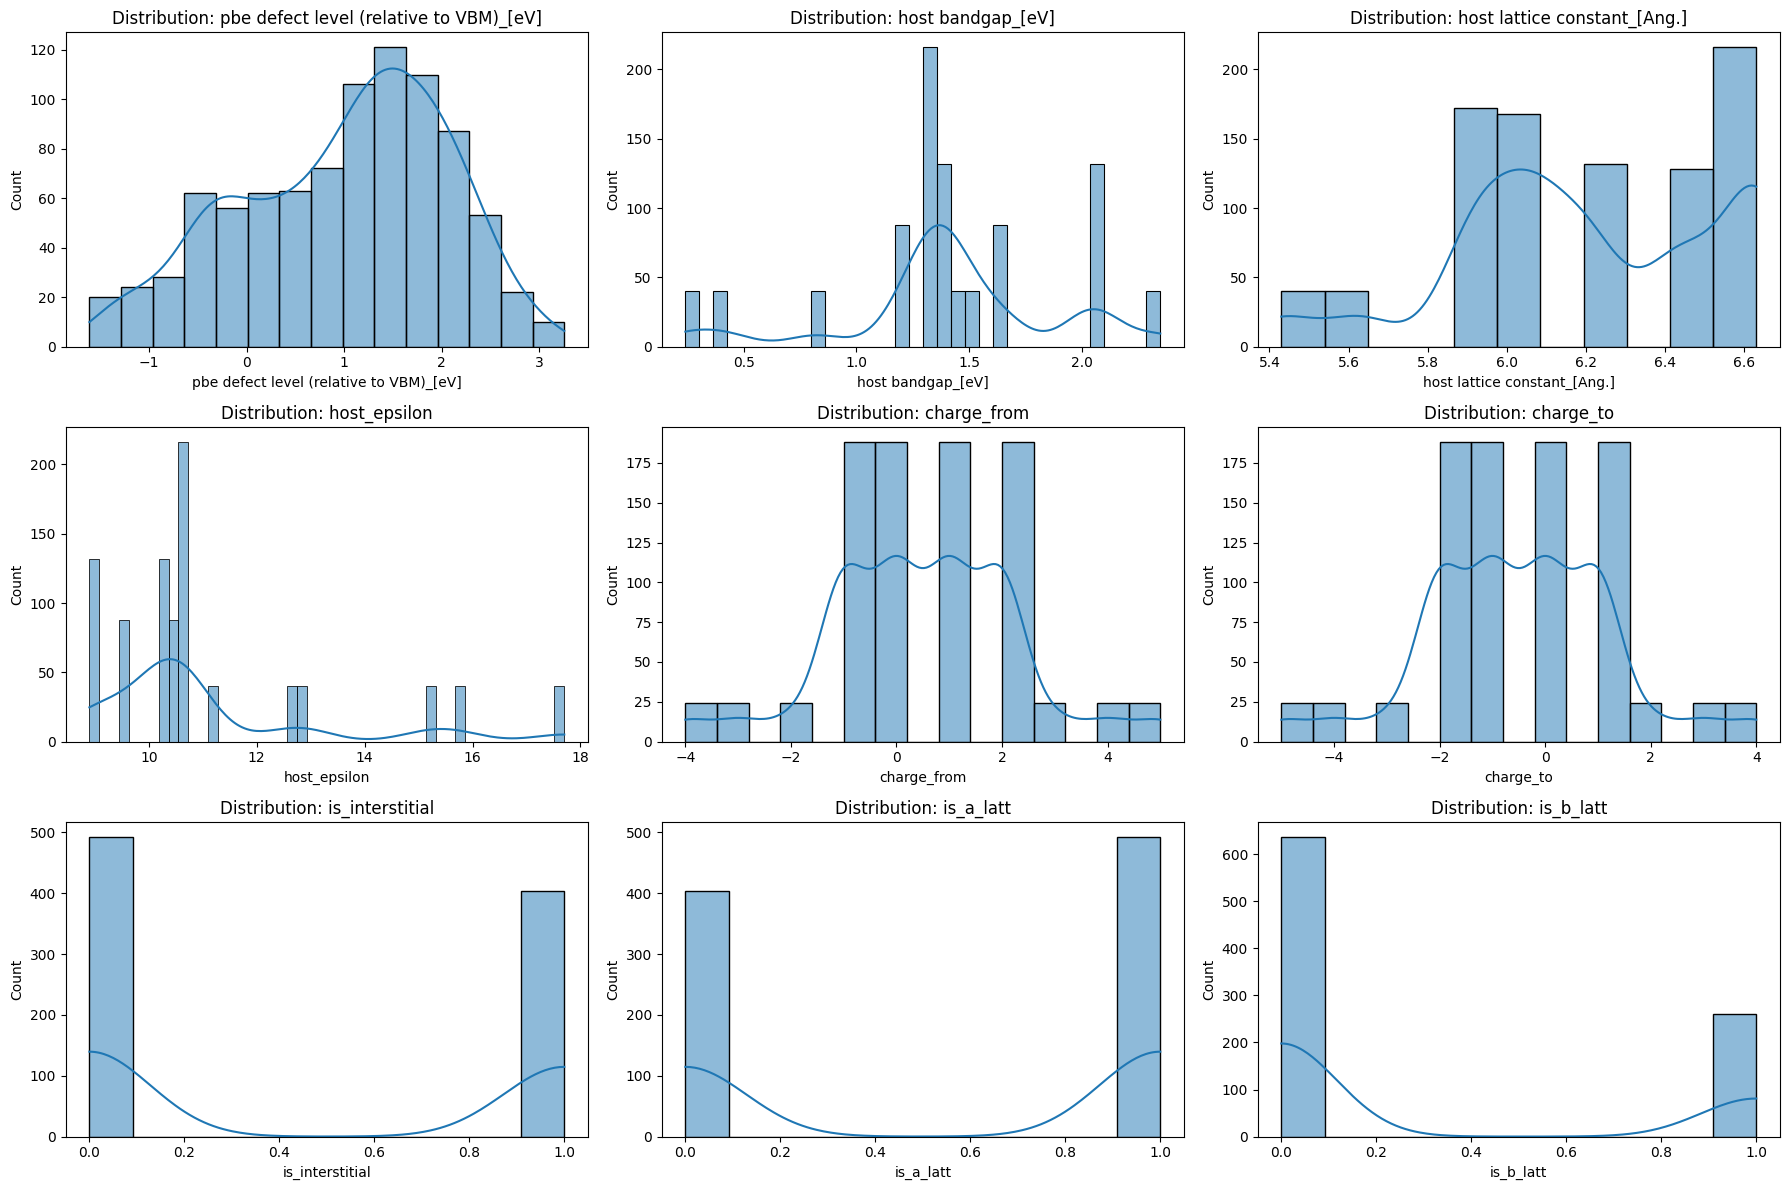

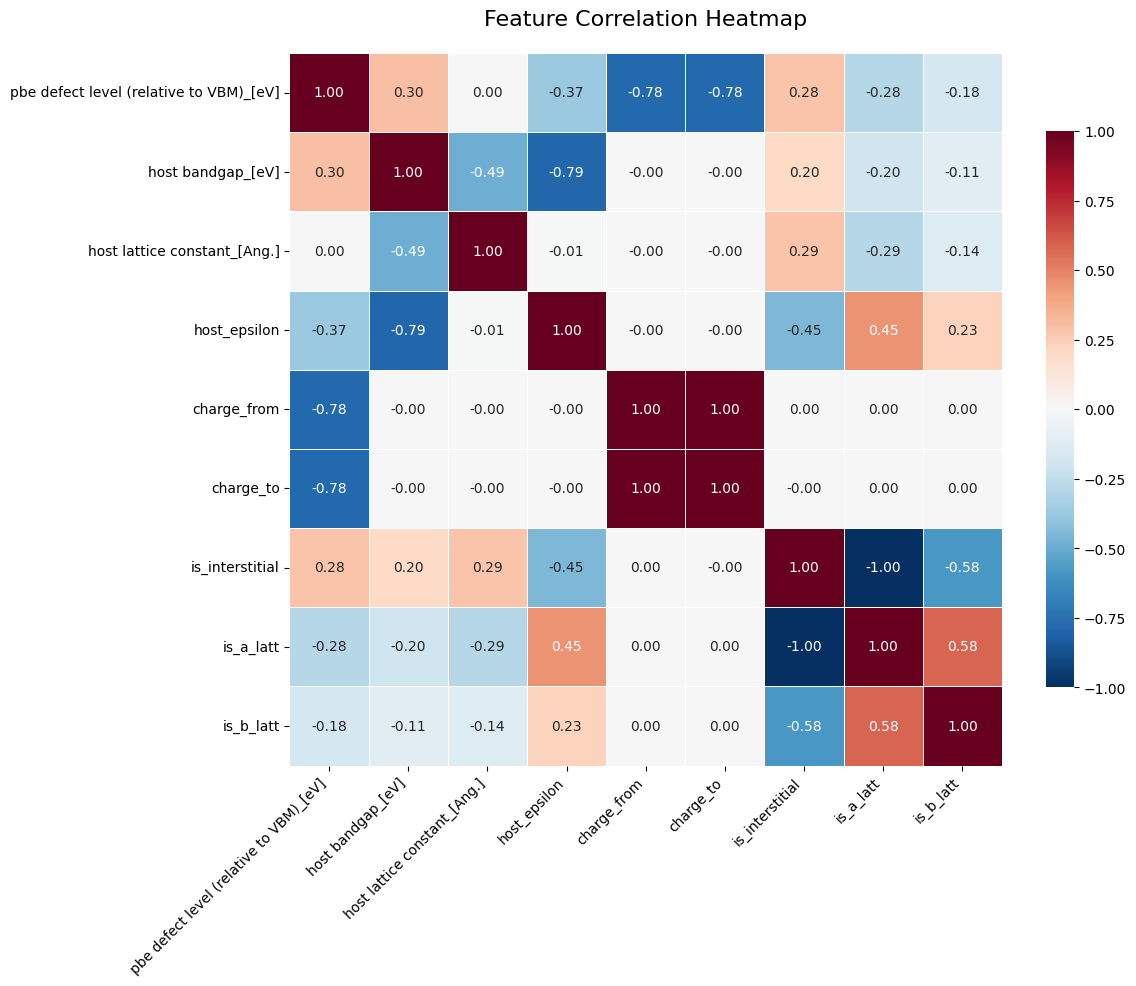

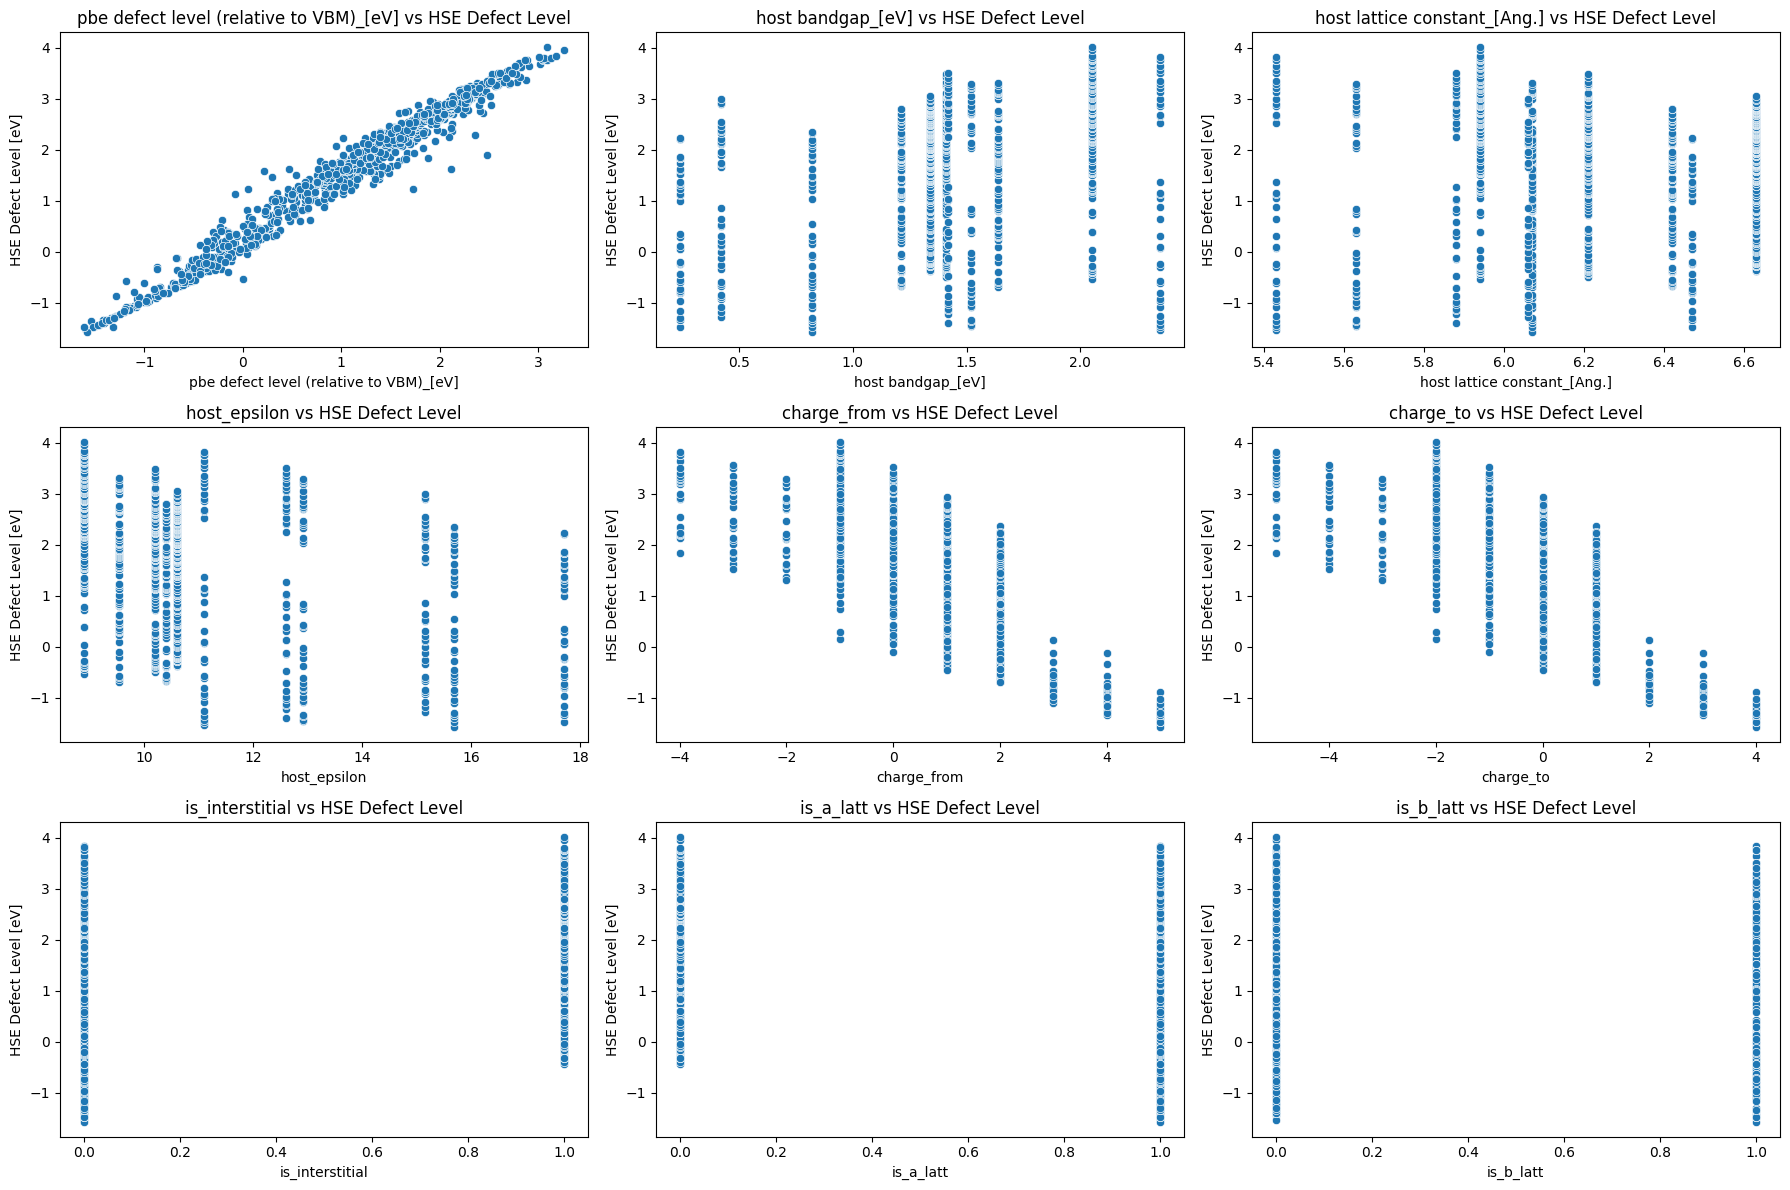

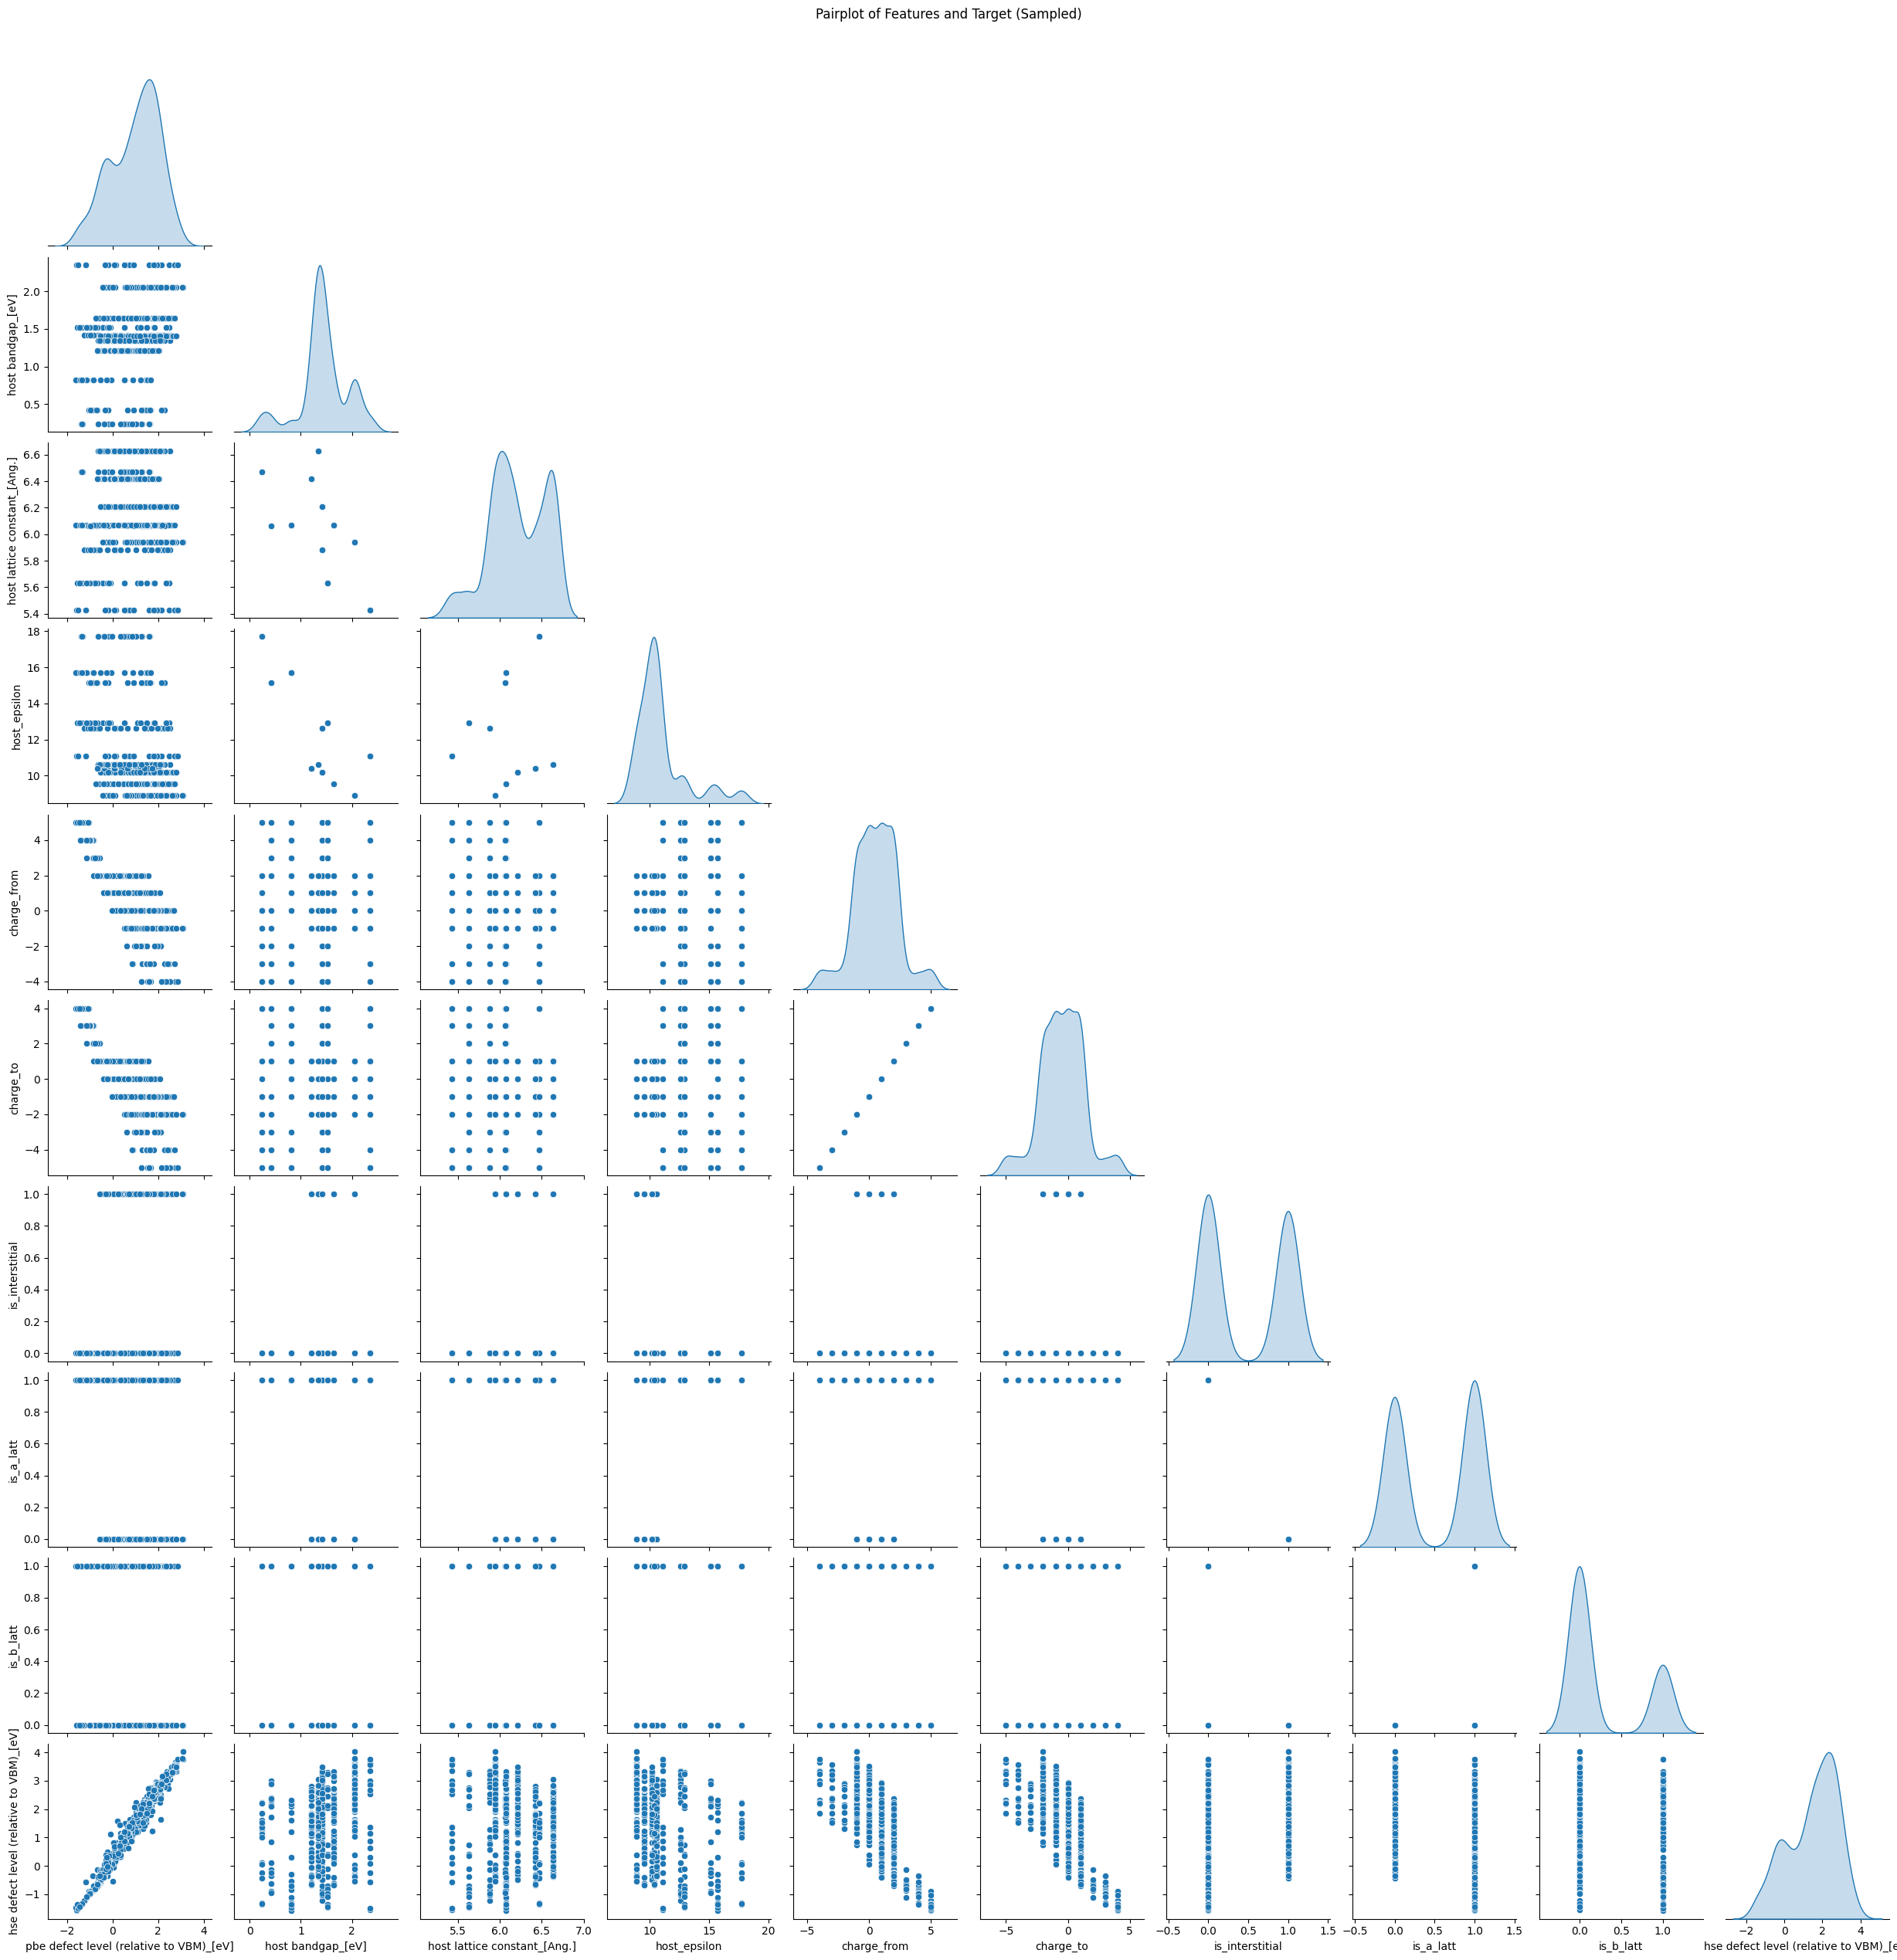

In [ ]:
# -----------------------------------
# Imports for Visualization
# -----------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.style.use('default')

# -----------------------------------
# 1. Distribution Plots
# -----------------------------------

# Plot feature distributions
plt.figure(figsize=(18, 12))

for i, feature in enumerate(selected_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(X[feature], kde=True)
    plt.title(f'Distribution: {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

# -----------------------------------
# Improved Correlation Heatmap
# -----------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlation
corr_matrix = X.corr()

# Plot
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='RdBu_r',
    fmt='.2f',
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.75},
    annot_kws={"size": 10}
)
plt.title('Feature Correlation Heatmap', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

# -----------------------------------
# 3. Target vs Feature Scatterplots
# -----------------------------------
plt.figure(figsize=(18, 12))

for i, feature in enumerate(selected_features, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=X[feature], y=y)
    plt.title(f'{feature} vs HSE Defect Level')
    plt.xlabel(feature)
    plt.ylabel('HSE Defect Level [eV]')

plt.tight_layout()
plt.show()

# -----------------------------------
# 4. Pairplot (optional but heavy if >1000 points)
# -----------------------------------
# You can downsample to ~500 points for faster rendering if needed
sample_df = df.sample(n=min(500, df.shape[0]), random_state=42)

sns.pairplot(sample_df[selected_features + [target]], diag_kind="kde", corner=True)
plt.suptitle('Pairplot of Features and Target (Sampled)', y=1.02)
plt.show()


##PCA


Explained Variance Ratios by 3 Components:
[0.52361348 0.40103105 0.03817275]
Total Variance Captured: 0.96


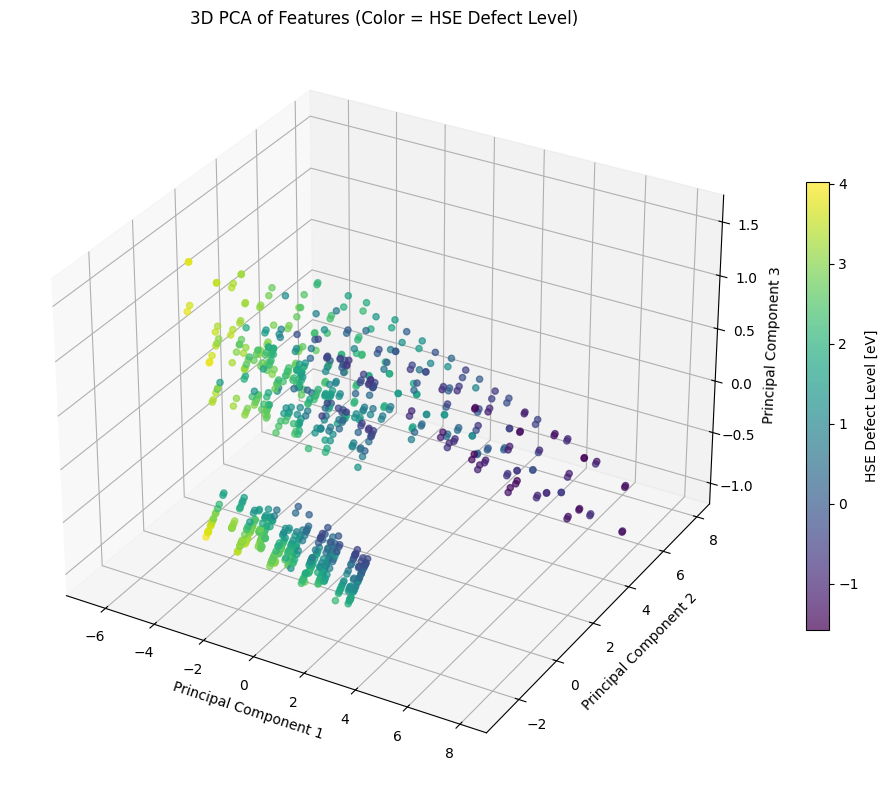

In [ ]:
# -----------------------------------
# PCA 3D Visualization
# -----------------------------------
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D plots
import matplotlib.pyplot as plt

# Perform PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Variance explained
print("\nExplained Variance Ratios by 3 Components:")
print(pca.explained_variance_ratio_)
print(f"Total Variance Captured: {np.sum(pca.explained_variance_ratio_):.2f}")

# Create a DataFrame
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df['hse_defect_level'] = y.values  # Add target for coloring

# 3D Scatter Plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# Scatter
sc = ax.scatter(
    pca_df['PC1'], pca_df['PC2'], pca_df['PC3'],
    c=pca_df['hse_defect_level'],
    cmap='viridis',  # Or 'coolwarm'
    alpha=0.7
)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA of Features (Color = HSE Defect Level)')

# Color bar
cbar = fig.colorbar(sc, ax=ax, shrink=0.6)
cbar.set_label('HSE Defect Level [eV]')

plt.tight_layout()
plt.show()


##Mutual Information Feature Importance Scores


📈 Mutual Information Feature Importance Scores:
pbe defect level (relative to VBM)_[eV]    1.953876
charge_from                                0.588287
charge_to                                  0.588287
host_epsilon                               0.254763
host bandgap_[eV]                          0.248778
host lattice constant_[Ang.]               0.231255
is_interstitial                            0.085412
is_a_latt                                  0.085412
is_b_latt                                  0.000000
dtype: float64


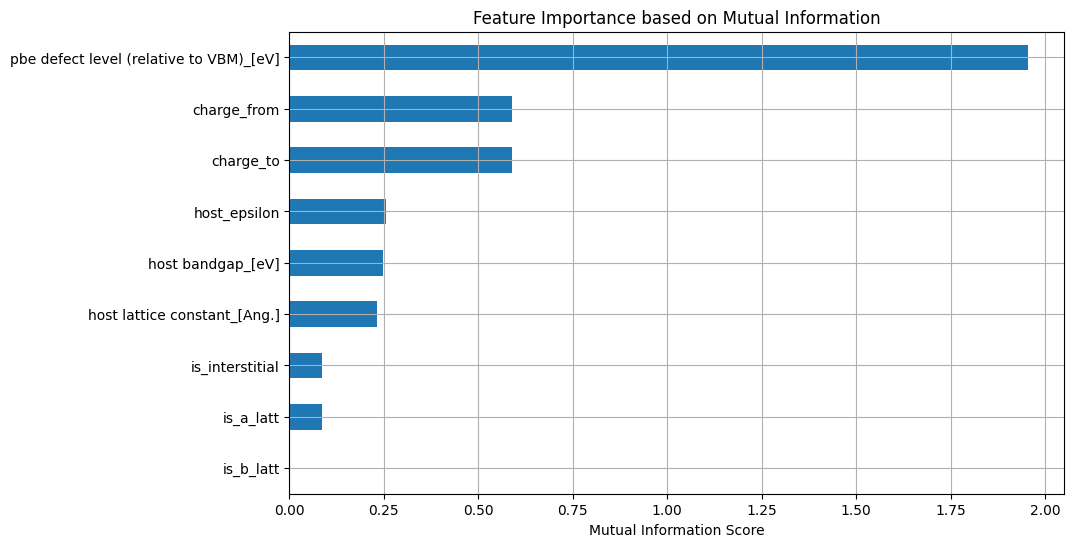

In [ ]:
# -----------------------------------
# Feature Importance using Mutual Information
# -----------------------------------
from sklearn.feature_selection import mutual_info_regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Calculate Mutual Information
mi_scores = mutual_info_regression(X, y, random_state=42)
mi_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

# Display
print("\n Mutual Information Feature Importance Scores:")
print(mi_scores)

# Plot
plt.figure(figsize=(10,6))
mi_scores.plot(kind='barh')
plt.title('Feature Importance based on Mutual Information')
plt.xlabel('Mutual Information Score')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()


##Standard MLP Model

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,601 (37.50 KB)

 Trainable params: 9,601 (37.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 2.7858 - mae: 1.4093 - val_loss: 0.4478 - val_mae: 0.5924
Epoch 2/150
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4892 - mae: 0.5582 - val_loss: 0.2211 - val_mae: 0.3581
Epoch 3/150
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3209 - mae: 0.4626 - val_loss: 0.1445 - val_mae: 0.3031
Epoch 4/150
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2481 - mae: 0.3962 - val_loss: 0.1030 - val_mae: 0.2485
Epoch 5/150
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2076 - mae: 0.3667 - val_loss: 0.0857 - val_mae: 0.2067
Epoch 6/150
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1999 - mae: 0.3562 - val_loss: 0.0697 - val_mae: 0.1946
Epoch 7/150
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1943 - mae: 0.3480 - val_loss: 0.0684 - val_mae: 0.1932
Epoch 8/150
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1800 - mae: 0.3370 - val_loss: 0.0654 - val_mae: 0.1842
Epoch 9/150
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.14

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

📊 Baseline MLP Model Performance:
Test MSE: 0.0563
Test MAE: 0.1638
Test R2 Score: 0.9604


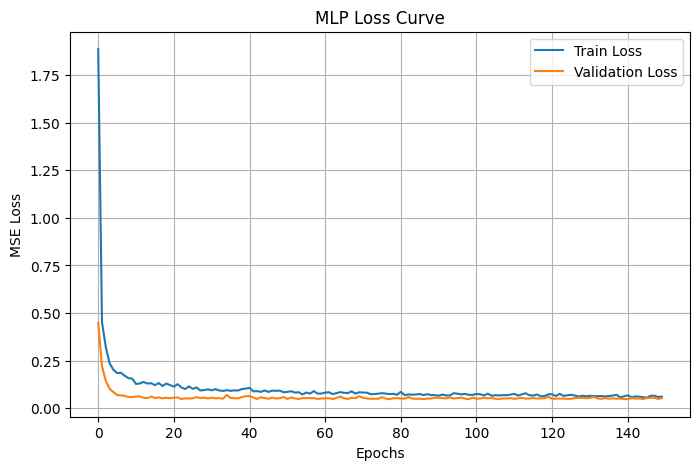

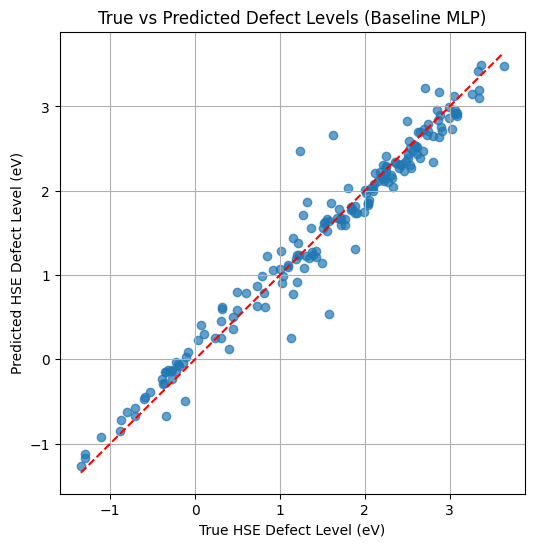

In [ ]:
# -----------------------------------
# 1. Imports
# -----------------------------------
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Load prepared data
X_train_scaled = np.load('/content/X_train_scaled.npy')
X_test_scaled = np.load('/content/X_test_scaled.npy')
y_train = np.load('/content/y_train.npy')
y_test = np.load('/content/y_test.npy')

# -----------------------------------
# 2. Build a Standard MLP Model
# -----------------------------------
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')  # Regression output
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

model.summary()

# -----------------------------------
# 3. Train the Model
# -----------------------------------
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.1,
    epochs=150,
    batch_size=32,
    verbose=1
)

# -----------------------------------
# 4. Evaluate the Model
# -----------------------------------
y_pred = model.predict(X_test_scaled).flatten()

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n📊 Baseline MLP Model Performance:")
print(f"Test MSE: {mse:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test R2 Score: {r2:.4f}")

# -----------------------------------
# 5. Plot Loss Curve
# -----------------------------------
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('MLP Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid()
plt.show()

# -----------------------------------
# 6. Plot True vs Predicted
# -----------------------------------
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('True HSE Defect Level (eV)')
plt.ylabel('Predicted HSE Defect Level (eV)')
plt.title('True vs Predicted Defect Levels (Baseline MLP)')
plt.grid()
plt.show()


##Check Physical Violations

In [ ]:
# -----------------------------------
# 7. Check Physical Violations
# -----------------------------------

# Load original full data
import pandas as pd

df_full = pd.read_csv('/content/Dataset_semiconductor_defectlevels_v1.csv')
df_full = df_full.dropna(subset=['hse defect level (relative to VBM)_[eV]'])

selected_features = [
    'pbe defect level (relative to VBM)_[eV]',
    'host bandgap_[eV]',
    'host lattice constant_[Ang.]',
    'host_epsilon',
    'charge_from',
    'charge_to',
    'is_interstitial',
    'is_a_latt',
    'is_b_latt'
]

X_full = df_full[selected_features].reset_index(drop=True)

from sklearn.model_selection import train_test_split
_, X_test_unscaled, _, _ = train_test_split(X_full, df_full['hse defect level (relative to VBM)_[eV]'], test_size=0.2, random_state=42)

# Extract host bandgap for test samples
bandgap_test = X_test_unscaled['host bandgap_[eV]'].values

# Now check violations
violations_lower = np.sum(y_pred < 0)
violations_upper = np.sum(y_pred > bandgap_test)
total_violations = violations_lower + violations_upper

violation_percentage = (total_violations / len(y_pred)) * 100

print(f"\n Physical Violations in Test Set:")
print(f"Predicted < 0 violations: {violations_lower}")
print(f"Predicted > Bandgap violations: {violations_upper}")
print(f"Total Violations: {total_violations} out of {len(y_pred)} samples")
print(f"Violation Rate: {violation_percentage:.2f}%")



⚡ Physical Violations in Test Set:
Predicted < 0 violations: 28
Predicted > Bandgap violations: 104
Total Violations: 132 out of 180 samples
Violation Rate: 73.33%


##Physics-Informed MLP Model (Penalty weight =1)

Epoch 10/150, Loss: 0.6292
Epoch 20/150, Loss: 0.6023
Epoch 30/150, Loss: 0.5890
Epoch 40/150, Loss: 0.5691
Epoch 50/150, Loss: 0.5669
Epoch 60/150, Loss: 0.5647
Epoch 70/150, Loss: 0.5581
Epoch 80/150, Loss: 0.5550
Epoch 90/150, Loss: 0.5502
Epoch 100/150, Loss: 0.5503
Epoch 110/150, Loss: 0.5463
Epoch 120/150, Loss: 0.5507
Epoch 130/150, Loss: 0.5536
Epoch 140/150, Loss: 0.5423


Epoch 150/150, Loss: 0.5468
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

📊 Physics-Informed MLP Model Performance:
Test MSE: 0.1533
Test MAE: 0.3381
Test R2 Score: 0.8922


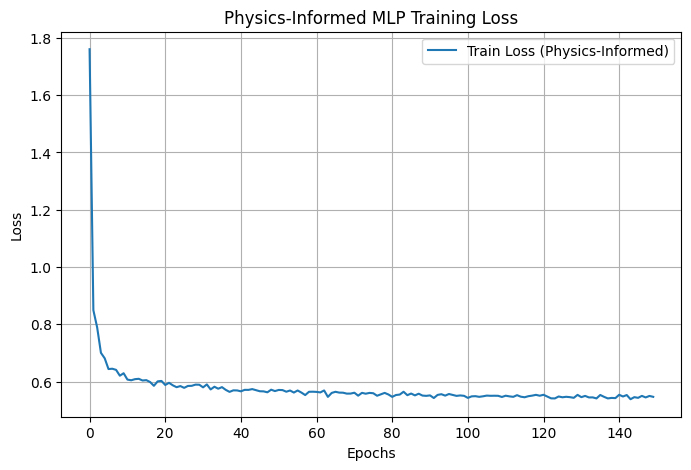

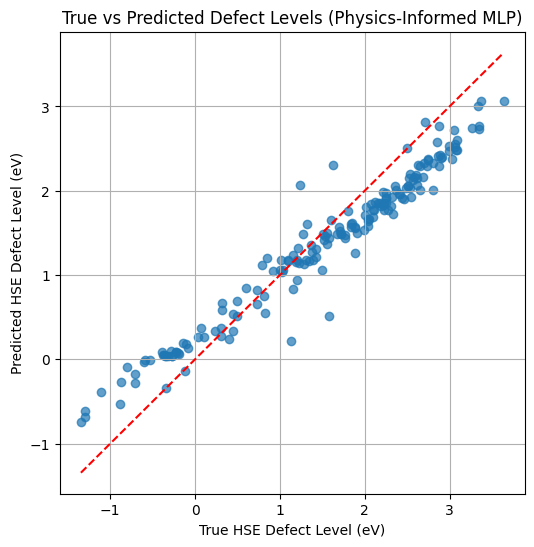

In [ ]:
# -----------------------------------
# 1. Imports
# -----------------------------------
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load prepared data
X_train_scaled = np.load('/content/X_train_scaled.npy')
X_test_scaled = np.load('/content/X_test_scaled.npy')
y_train = np.load('/content/y_train.npy')
y_test = np.load('/content/y_test.npy')

# Also load original (unscaled) training features to access bandgap
df_full = pd.read_csv('/content/Dataset_semiconductor_defectlevels_v1.csv')
df_full = df_full.dropna(subset=['hse defect level (relative to VBM)_[eV]'])

selected_features = [
    'pbe defect level (relative to VBM)_[eV]',
    'host bandgap_[eV]',
    'host lattice constant_[Ang.]',
    'host_epsilon',
    'charge_from',
    'charge_to',
    'is_interstitial',
    'is_a_latt',
    'is_b_latt'
]

X_full = df_full[selected_features].reset_index(drop=True)
_, X_test_unscaled, _, y_test_unscaled = train_test_split(X_full, df_full['hse defect level (relative to VBM)_[eV]'], test_size=0.2, random_state=42)

# -----------------------------------
# 2. Define Physics-Informed Custom Loss
# -----------------------------------
def physics_informed_loss(y_true, y_pred, bandgap_batch):
    mse = tf.reduce_mean(tf.square(y_true - y_pred))

    # Physics constraint penalties
    penalty_lower = tf.reduce_mean(tf.nn.relu(-y_pred))  # y_pred < 0
    penalty_upper = tf.reduce_mean(tf.nn.relu(y_pred - bandgap_batch))  # y_pred > Eg

    physics_penalty = penalty_lower + penalty_upper

    total_loss = mse + 1.0 * physics_penalty  # 1.0 is penalty weight (can tune)
    return total_loss

# -----------------------------------
# 3. Build Physics-Informed MLP Model
# -----------------------------------
input_dim = X_train_scaled.shape[1]

# Define model
physics_model = Sequential([
    Dense(128, activation='relu', input_shape=(input_dim,)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')
])

optimizer = Adam(learning_rate=0.001)

# Placeholder compile (we will override loss manually in training loop)
physics_model.compile(optimizer=optimizer, loss='mse')

# -----------------------------------
# 4. Custom Training Loop with Physics-Informed Loss
# -----------------------------------
batch_size = 32
epochs = 150
train_size = X_train_scaled.shape[0]
steps_per_epoch = train_size // batch_size

train_losses = []

for epoch in range(epochs):
    epoch_losses = []

    idx = np.random.permutation(train_size)
    X_train_shuffled = X_train_scaled[idx]
    y_train_shuffled = y_train[idx]

    for step in range(steps_per_epoch):
        start = step * batch_size
        end = (step + 1) * batch_size

        X_batch = X_train_shuffled[start:end]
        y_batch = y_train_shuffled[start:end]

        # Need bandgap from unscaled features
        bandgap_batch = X_full.iloc[idx[start:end]]['host bandgap_[eV]'].values
        bandgap_batch = bandgap_batch.reshape(-1, 1)
        bandgap_batch = tf.convert_to_tensor(bandgap_batch, dtype=tf.float32)

        with tf.GradientTape() as tape:
            y_pred = physics_model(X_batch, training=True)
            loss = physics_informed_loss(tf.convert_to_tensor(y_batch.reshape(-1, 1), dtype=tf.float32), y_pred, bandgap_batch)

        grads = tape.gradient(loss, physics_model.trainable_variables)
        optimizer.apply_gradients(zip(grads, physics_model.trainable_variables))

        epoch_losses.append(loss.numpy())

    avg_epoch_loss = np.mean(epoch_losses)
    train_losses.append(avg_epoch_loss)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_epoch_loss:.4f}")

# -----------------------------------
# 5. Evaluate Physics-Informed Model
# -----------------------------------
y_pred_physics = physics_model.predict(X_test_scaled).flatten()

mse_physics = mean_squared_error(y_test, y_pred_physics)
mae_physics = mean_absolute_error(y_test, y_pred_physics)
r2_physics = r2_score(y_test, y_pred_physics)

print("\n📊 Physics-Informed MLP Model Performance:")
print(f"Test MSE: {mse_physics:.4f}")
print(f"Test MAE: {mae_physics:.4f}")
print(f"Test R2 Score: {r2_physics:.4f}")

# -----------------------------------
# 6. Plot Loss Curve
# -----------------------------------
plt.figure(figsize=(8,5))
plt.plot(train_losses, label='Train Loss (Physics-Informed)')
plt.title('Physics-Informed MLP Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

# -----------------------------------
# 7. True vs Predicted Plot
# -----------------------------------
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_physics, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('True HSE Defect Level (eV)')
plt.ylabel('Predicted HSE Defect Level (eV)')
plt.title('True vs Predicted Defect Levels (Physics-Informed MLP)')
plt.grid()
plt.show()


##SBS

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 

📊 Baseline MLP Performance:
Test MSE: 0.0548
Test MAE: 0.1635
Test R2 Score: 0.9615

📊 Physics-Informed MLP Performance:
Test MSE: 0.1533
Test MAE: 0.3381
Test R2 Score: 0.8922


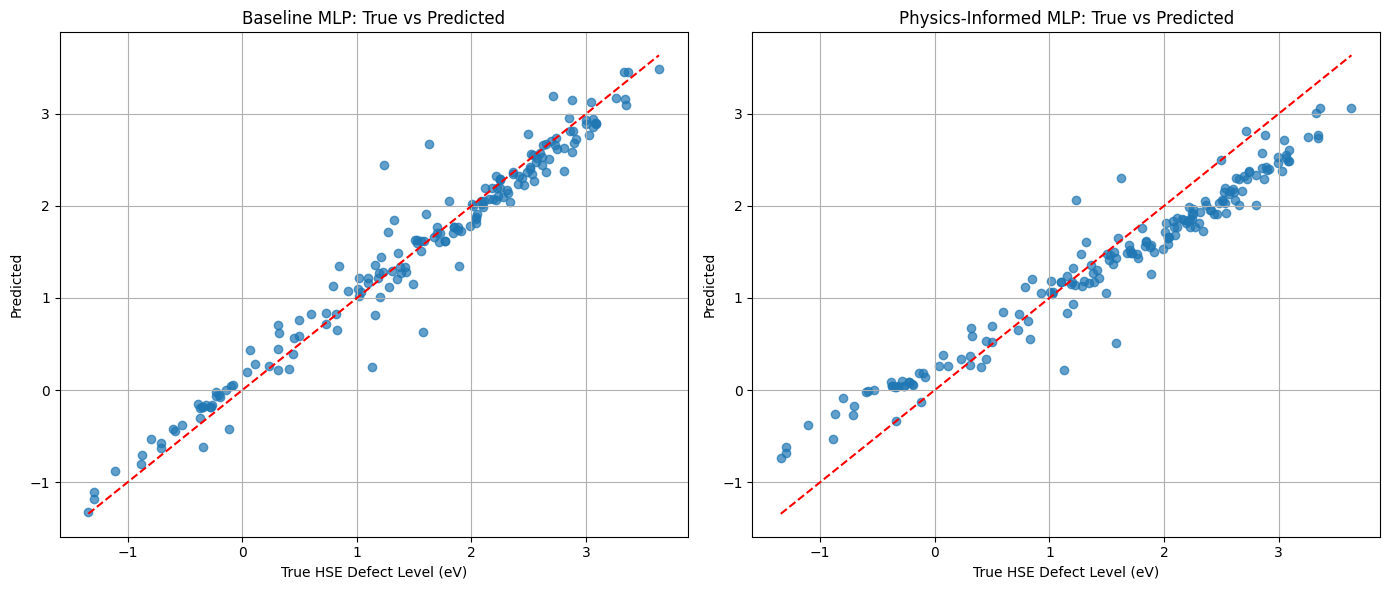

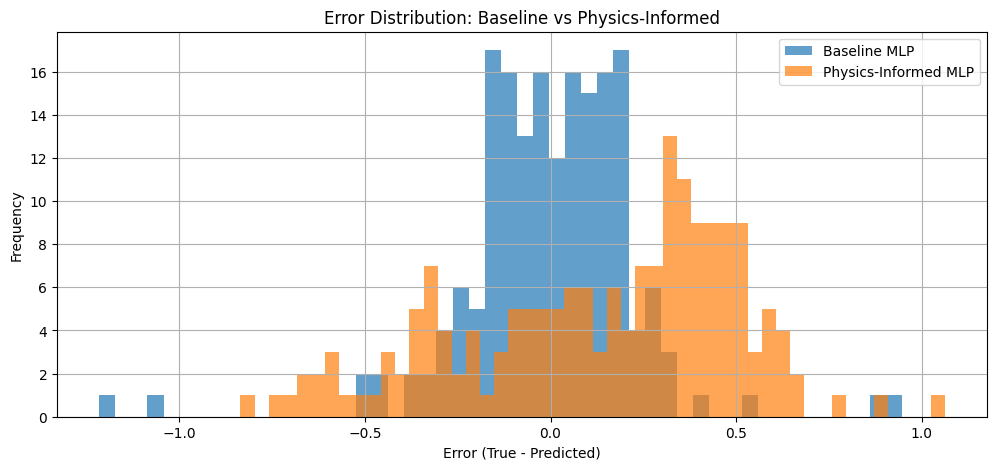

In [ ]:
# -----------------------------------
# Phase 4A: Side-by-Side Comparison
# -----------------------------------
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predict
y_pred_baseline = model.predict(X_test_scaled).flatten()
y_pred_physics = physics_model.predict(X_test_scaled).flatten()

# Metrics
def evaluate_predictions(y_true, y_pred, model_name="Model"):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n📊 {model_name} Performance:")
    print(f"Test MSE: {mse:.4f}")
    print(f"Test MAE: {mae:.4f}")
    print(f"Test R2 Score: {r2:.4f}")
    return mse, mae, r2

mse_base, mae_base, r2_base = evaluate_predictions(y_test, y_pred_baseline, "Baseline MLP")
mse_phys, mae_phys, r2_phys = evaluate_predictions(y_test, y_pred_physics, "Physics-Informed MLP")

# Plot True vs Predicted for both
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.scatter(y_test, y_pred_baseline, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.title('Baseline MLP: True vs Predicted')
plt.xlabel('True HSE Defect Level (eV)')
plt.ylabel('Predicted')
plt.grid()

plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_physics, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.title('Physics-Informed MLP: True vs Predicted')
plt.xlabel('True HSE Defect Level (eV)')
plt.ylabel('Predicted')
plt.grid()

plt.tight_layout()
plt.show()

# Plot Error Histograms
plt.figure(figsize=(12,5))

plt.hist(y_test - y_pred_baseline, bins=50, alpha=0.7, label='Baseline MLP')
plt.hist(y_test - y_pred_physics, bins=50, alpha=0.7, label='Physics-Informed MLP')
plt.title('Error Distribution: Baseline vs Physics-Informed')
plt.xlabel('Error (True - Predicted)')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()


##Physics-Informed MLP Model (Penalty weight =1) with Physics Loss

Epoch 10/150, Loss: 0.6231
Epoch 20/150, Loss: 0.5975
Epoch 30/150, Loss: 0.5818
Epoch 40/150, Loss: 0.5801
Epoch 50/150, Loss: 0.5696
Epoch 60/150, Loss: 0.5637
Epoch 70/150, Loss: 0.5668
Epoch 80/150, Loss: 0.5584
Epoch 90/150, Loss: 0.5504
Epoch 100/150, Loss: 0.5476
Epoch 110/150, Loss: 0.5462
Epoch 120/150, Loss: 0.5516
Epoch 130/150, Loss: 0.5467
Epoch 140/150, Loss: 0.5497


Epoch 150/150, Loss: 0.5459
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

📊 Optimized Physics-Informed MLP Performance:
Test MSE: 0.1811
Test MAE: 0.3714
Test R2 Score: 0.8727


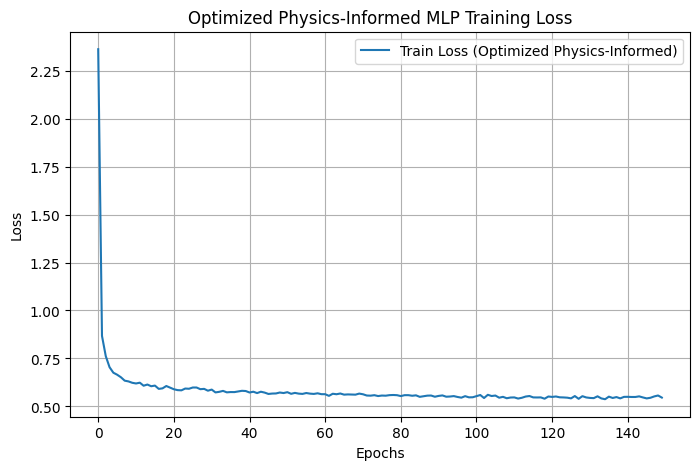

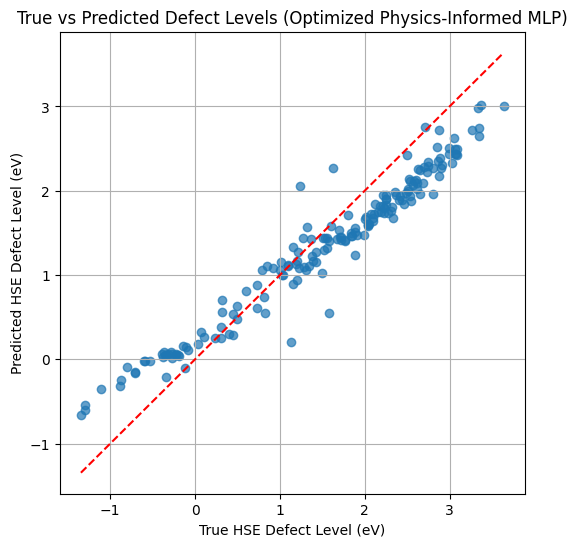


⚡ Physics Violations in Test Set: 107 out of 180
⚡ Violation Rate: 59.44%


In [ ]:
# -----------------------------------
# 1. Imports
# -----------------------------------
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load prepared data
X_train_scaled = np.load('/content/X_train_scaled.npy')
X_test_scaled = np.load('/content/X_test_scaled.npy')
y_train = np.load('/content/y_train.npy')
y_test = np.load('/content/y_test.npy')

# Load full (unscaled) data to get bandgap
import pandas as pd
df_full = pd.read_csv('/content/Dataset_semiconductor_defectlevels_v1.csv')
df_full = df_full.dropna(subset=['hse defect level (relative to VBM)_[eV]'])

selected_features = [
    'pbe defect level (relative to VBM)_[eV]',
    'host bandgap_[eV]',
    'host lattice constant_[Ang.]',
    'host_epsilon',
    'charge_from',
    'charge_to',
    'is_interstitial',
    'is_a_latt',
    'is_b_latt'
]

X_full = df_full[selected_features].reset_index(drop=True)

from sklearn.model_selection import train_test_split
_, X_test_unscaled, _, _ = train_test_split(X_full, df_full['hse defect level (relative to VBM)_[eV]'], test_size=0.2, random_state=42)

# -----------------------------------
# 2. Define Smarter Physics-Informed Loss
# -----------------------------------
def improved_physics_informed_loss(y_true, y_pred, bandgap_batch):
    mse = tf.reduce_mean(tf.square(y_true - y_pred))

    # Only penalize when there is violation
    penalty_lower = tf.reduce_sum(tf.maximum(0.0, -y_pred))
    penalty_upper = tf.reduce_sum(tf.maximum(0.0, y_pred - bandgap_batch))

    physics_penalty = (penalty_lower + penalty_upper) / tf.cast(tf.shape(y_true)[0], tf.float32)

    total_loss = mse + 1.0 * physics_penalty  # Penalty weight = 1.0
    return total_loss

# -----------------------------------
# 3. Build Optimized Physics-Informed MLP
# -----------------------------------
input_dim = X_train_scaled.shape[1]

model_optimized = Sequential([
    Dense(128, activation='relu', input_shape=(input_dim,)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')
])

optimizer = Adam(learning_rate=0.001)
model_optimized.compile(optimizer=optimizer, loss='mse')  # Placeholder loss

# -----------------------------------
# 4. Custom Training Loop with Smarter Loss
# -----------------------------------
batch_size = 32
epochs = 150
train_size = X_train_scaled.shape[0]
steps_per_epoch = train_size // batch_size

train_losses = []

for epoch in range(epochs):
    epoch_losses = []

    idx = np.random.permutation(train_size)
    X_train_shuffled = X_train_scaled[idx]
    y_train_shuffled = y_train[idx]

    for step in range(steps_per_epoch):
        start = step * batch_size
        end = (step + 1) * batch_size

        X_batch = X_train_shuffled[start:end]
        y_batch = y_train_shuffled[start:end]

        bandgap_batch = X_full.iloc[idx[start:end]]['host bandgap_[eV]'].values.reshape(-1, 1)
        bandgap_batch = tf.convert_to_tensor(bandgap_batch, dtype=tf.float32)

        with tf.GradientTape() as tape:
            y_pred = model_optimized(X_batch, training=True)
            loss = improved_physics_informed_loss(
                tf.convert_to_tensor(y_batch.reshape(-1, 1), dtype=tf.float32),
                y_pred,
                bandgap_batch
            )

        grads = tape.gradient(loss, model_optimized.trainable_variables)
        optimizer.apply_gradients(zip(grads, model_optimized.trainable_variables))

        epoch_losses.append(loss.numpy())

    avg_epoch_loss = np.mean(epoch_losses)
    train_losses.append(avg_epoch_loss)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_epoch_loss:.4f}")

# -----------------------------------
# 5. Evaluate Optimized Physics-Informed Model
# -----------------------------------
y_pred_optimized = model_optimized.predict(X_test_scaled).flatten()

mse_optimized = mean_squared_error(y_test, y_pred_optimized)
mae_optimized = mean_absolute_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

print("\n📊 Optimized Physics-Informed MLP Performance:")
print(f"Test MSE: {mse_optimized:.4f}")
print(f"Test MAE: {mae_optimized:.4f}")
print(f"Test R2 Score: {r2_optimized:.4f}")

# -----------------------------------
# 6. Plot Loss Curve
# -----------------------------------
plt.figure(figsize=(8,5))
plt.plot(train_losses, label='Train Loss (Optimized Physics-Informed)')
plt.title('Optimized Physics-Informed MLP Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

# -----------------------------------
# 7. True vs Predicted Plot
# -----------------------------------
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_optimized, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('True HSE Defect Level (eV)')
plt.ylabel('Predicted HSE Defect Level (eV)')
plt.title('True vs Predicted Defect Levels (Optimized Physics-Informed MLP)')
plt.grid()
plt.show()

# -----------------------------------
# 8. Check Physics Violations
# -----------------------------------
# Bandgap values for test set
bandgap_test = X_test_unscaled['host bandgap_[eV]'].values

# How many predictions violate 0 < pred < Eg
violations = np.sum((y_pred_optimized < 0) | (y_pred_optimized > bandgap_test))
violation_percentage = (violations / len(y_pred_optimized)) * 100

print(f"\n Physics Violations in Test Set: {violations} out of {len(y_pred_optimized)}")
print(f" Violation Rate: {violation_percentage:.2f}%")


##Physics-Informed MLP Model (Penalty weight =0.42)

Epoch 10/150, Loss: 0.3942
Epoch 20/150, Loss: 0.3438
Epoch 30/150, Loss: 0.3393
Epoch 40/150, Loss: 0.3394
Epoch 50/150, Loss: 0.3262
Epoch 60/150, Loss: 0.3307
Epoch 70/150, Loss: 0.3154
Epoch 80/150, Loss: 0.3205
Epoch 90/150, Loss: 0.3110
Epoch 100/150, Loss: 0.2988
Epoch 110/150, Loss: 0.3037
Epoch 120/150, Loss: 0.3057
Epoch 130/150, Loss: 0.3097
Epoch 140/150, Loss: 0.3032
Epoch 150/150, Loss: 0.3073
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step 

📊 Optimized Physics-Informed MLP Performance:
Test MSE: 0.0860
Test MAE: 0.2442
Test R2 Score: 0.9396


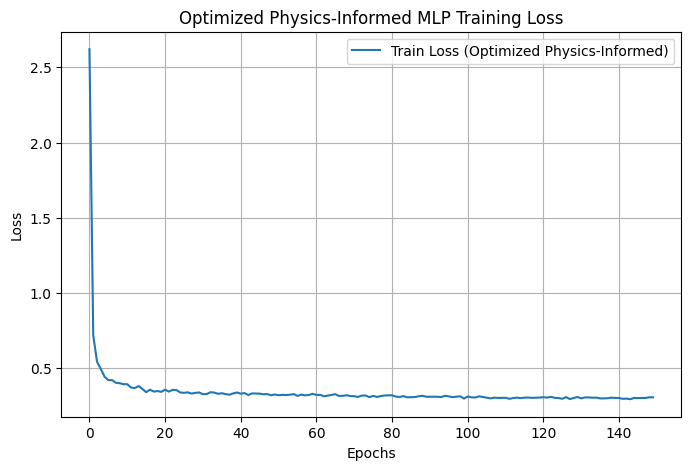

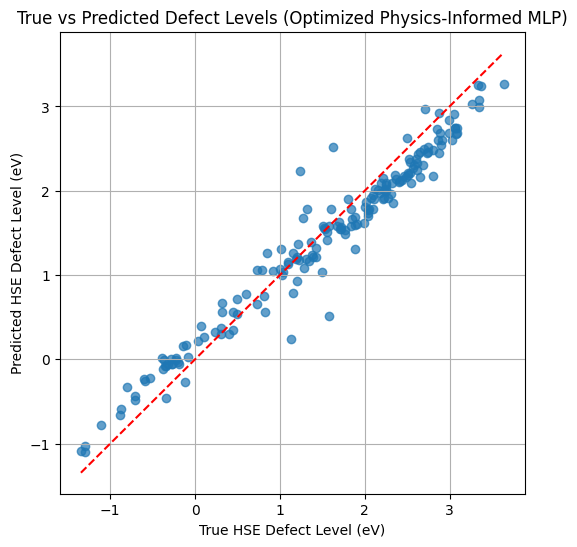


⚡ Physics Violations in Test Set: 123 out of 180
⚡ Violation Rate: 68.33%


In [ ]:
# -----------------------------------
# 1. Imports
# -----------------------------------
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load prepared data
X_train_scaled = np.load('/content/X_train_scaled.npy')
X_test_scaled = np.load('/content/X_test_scaled.npy')
y_train = np.load('/content/y_train.npy')
y_test = np.load('/content/y_test.npy')

# Load full (unscaled) data to get bandgap
import pandas as pd
df_full = pd.read_csv('/content/Dataset_semiconductor_defectlevels_v1.csv')
df_full = df_full.dropna(subset=['hse defect level (relative to VBM)_[eV]'])

selected_features = [
    'pbe defect level (relative to VBM)_[eV]',
    'host bandgap_[eV]',
    'host lattice constant_[Ang.]',
    'host_epsilon',
    'charge_from',
    'charge_to',
    'is_interstitial',
    'is_a_latt',
    'is_b_latt'
]

X_full = df_full[selected_features].reset_index(drop=True)

from sklearn.model_selection import train_test_split
_, X_test_unscaled, _, _ = train_test_split(X_full, df_full['hse defect level (relative to VBM)_[eV]'], test_size=0.2, random_state=42)

# -----------------------------------
# 2. Define Smarter Physics-Informed Loss
# -----------------------------------
def improved_physics_informed_loss(y_true, y_pred, bandgap_batch):
    mse = tf.reduce_mean(tf.square(y_true - y_pred))

    # Only penalize when there is violation
    penalty_lower = tf.reduce_sum(tf.maximum(0.0, -y_pred))
    penalty_upper = tf.reduce_sum(tf.maximum(0.0, y_pred - bandgap_batch))

    physics_penalty = (penalty_lower + penalty_upper) / tf.cast(tf.shape(y_true)[0], tf.float32)

    total_loss = mse + 0.42 * physics_penalty  # Penalty weight = 0.42
    return total_loss

# -----------------------------------
# 3. Build Optimized Physics-Informed MLP
# -----------------------------------
input_dim = X_train_scaled.shape[1]

model_optimized = Sequential([
    Dense(128, activation='relu', input_shape=(input_dim,)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')
])

optimizer = Adam(learning_rate=0.001)
model_optimized.compile(optimizer=optimizer, loss='mse')  # Placeholder loss

# -----------------------------------
# 4. Custom Training Loop with Smarter Loss
# -----------------------------------
batch_size = 32
epochs = 150
train_size = X_train_scaled.shape[0]
steps_per_epoch = train_size // batch_size

train_losses = []

for epoch in range(epochs):
    epoch_losses = []

    idx = np.random.permutation(train_size)
    X_train_shuffled = X_train_scaled[idx]
    y_train_shuffled = y_train[idx]

    for step in range(steps_per_epoch):
        start = step * batch_size
        end = (step + 1) * batch_size

        X_batch = X_train_shuffled[start:end]
        y_batch = y_train_shuffled[start:end]

        bandgap_batch = X_full.iloc[idx[start:end]]['host bandgap_[eV]'].values.reshape(-1, 1)
        bandgap_batch = tf.convert_to_tensor(bandgap_batch, dtype=tf.float32)

        with tf.GradientTape() as tape:
            y_pred = model_optimized(X_batch, training=True)
            loss = improved_physics_informed_loss(
                tf.convert_to_tensor(y_batch.reshape(-1, 1), dtype=tf.float32),
                y_pred,
                bandgap_batch
            )

        grads = tape.gradient(loss, model_optimized.trainable_variables)
        optimizer.apply_gradients(zip(grads, model_optimized.trainable_variables))

        epoch_losses.append(loss.numpy())

    avg_epoch_loss = np.mean(epoch_losses)
    train_losses.append(avg_epoch_loss)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_epoch_loss:.4f}")

# -----------------------------------
# 5. Evaluate Optimized Physics-Informed Model
# -----------------------------------
y_pred_optimized = model_optimized.predict(X_test_scaled).flatten()

mse_optimized = mean_squared_error(y_test, y_pred_optimized)
mae_optimized = mean_absolute_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

print("\nOptimized Physics-Informed MLP Performance:")
print(f"Test MSE: {mse_optimized:.4f}")
print(f"Test MAE: {mae_optimized:.4f}")
print(f"Test R2 Score: {r2_optimized:.4f}")

# -----------------------------------
# 6. Plot Loss Curve
# -----------------------------------
plt.figure(figsize=(8,5))
plt.plot(train_losses, label='Train Loss (Optimized Physics-Informed)')
plt.title('Optimized Physics-Informed MLP Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

# -----------------------------------
# 7. True vs Predicted Plot
# -----------------------------------
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_optimized, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('True HSE Defect Level (eV)')
plt.ylabel('Predicted HSE Defect Level (eV)')
plt.title('True vs Predicted Defect Levels (Optimized Physics-Informed MLP)')
plt.grid()
plt.show()

# -----------------------------------
# 8. Check Physics Violations
# -----------------------------------
# Bandgap values for test set
bandgap_test = X_test_unscaled['host bandgap_[eV]'].values

# How many predictions violate 0 < pred < Eg
violations = np.sum((y_pred_optimized < 0) | (y_pred_optimized > bandgap_test))
violation_percentage = (violations / len(y_pred_optimized)) * 100

print(f"\n Physics Violations in Test Set: {violations} out of {len(y_pred_optimized)}")
print(f" Violation Rate: {violation_percentage:.2f}%")


##Physics-Informed MLP Model (Penalty weight =0.32)

Epoch 10/150, Loss: 0.3394
Epoch 20/150, Loss: 0.3099
Epoch 30/150, Loss: 0.2862
Epoch 40/150, Loss: 0.2739
Epoch 50/150, Loss: 0.2723
Epoch 60/150, Loss: 0.2696
Epoch 70/150, Loss: 0.2613
Epoch 80/150, Loss: 0.2601
Epoch 90/150, Loss: 0.2628
Epoch 100/150, Loss: 0.2634
Epoch 110/150, Loss: 0.2472
Epoch 120/150, Loss: 0.2465
Epoch 130/150, Loss: 0.2524
Epoch 140/150, Loss: 0.2481
Epoch 150/150, Loss: 0.2430
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

📊 Optimized Physics-Informed MLP Performance:
Test MSE: 0.0775
Test MAE: 0.2270
Test R2 Score: 0.9455


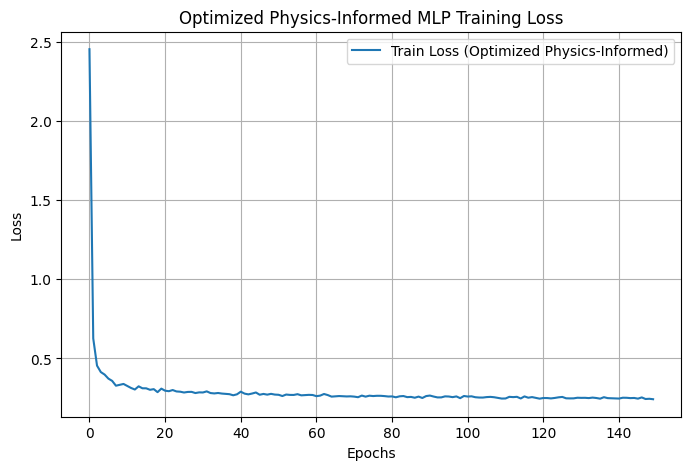

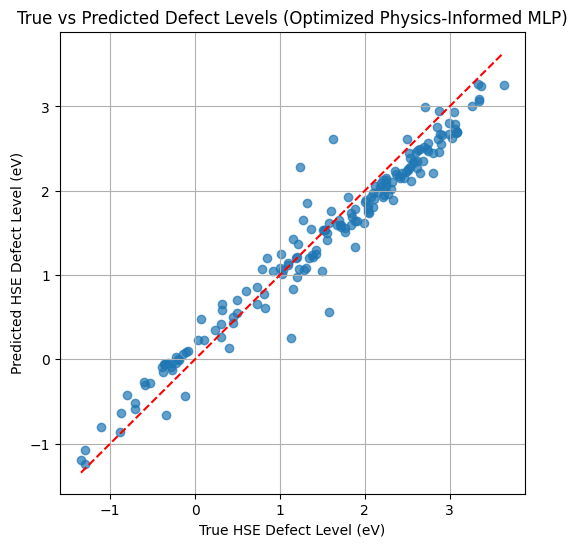


⚡ Physics Violations in Test Set: 125 out of 180
⚡ Violation Rate: 69.44%


In [ ]:
# -----------------------------------
# 1. Imports
# -----------------------------------
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load prepared data
X_train_scaled = np.load('/content/X_train_scaled.npy')
X_test_scaled = np.load('/content/X_test_scaled.npy')
y_train = np.load('/content/y_train.npy')
y_test = np.load('/content/y_test.npy')

# Load full (unscaled) data to get bandgap
import pandas as pd
df_full = pd.read_csv('/content/Dataset_semiconductor_defectlevels_v1.csv')
df_full = df_full.dropna(subset=['hse defect level (relative to VBM)_[eV]'])

selected_features = [
    'pbe defect level (relative to VBM)_[eV]',
    'host bandgap_[eV]',
    'host lattice constant_[Ang.]',
    'host_epsilon',
    'charge_from',
    'charge_to',
    'is_interstitial',
    'is_a_latt',
    'is_b_latt'
]

X_full = df_full[selected_features].reset_index(drop=True)

from sklearn.model_selection import train_test_split
_, X_test_unscaled, _, _ = train_test_split(X_full, df_full['hse defect level (relative to VBM)_[eV]'], test_size=0.2, random_state=42)

# -----------------------------------
# 2. Define Smarter Physics-Informed Loss
# -----------------------------------
def improved_physics_informed_loss(y_true, y_pred, bandgap_batch):
    mse = tf.reduce_mean(tf.square(y_true - y_pred))

    # Only penalize when there is violation
    penalty_lower = tf.reduce_sum(tf.maximum(0.0, -y_pred))
    penalty_upper = tf.reduce_sum(tf.maximum(0.0, y_pred - bandgap_batch))

    physics_penalty = (penalty_lower + penalty_upper) / tf.cast(tf.shape(y_true)[0], tf.float32)

    total_loss = mse + 0.32 * physics_penalty  # Penalty weight = 0.32
    return total_loss

# -----------------------------------
# 3. Build Optimized Physics-Informed MLP
# -----------------------------------
input_dim = X_train_scaled.shape[1]

model_optimized = Sequential([
    Dense(128, activation='relu', input_shape=(input_dim,)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')
])

optimizer = Adam(learning_rate=0.001)
model_optimized.compile(optimizer=optimizer, loss='mse')  # Placeholder loss

# -----------------------------------
# 4. Custom Training Loop with Smarter Loss
# -----------------------------------
batch_size = 32
epochs = 150
train_size = X_train_scaled.shape[0]
steps_per_epoch = train_size // batch_size

train_losses = []

for epoch in range(epochs):
    epoch_losses = []

    idx = np.random.permutation(train_size)
    X_train_shuffled = X_train_scaled[idx]
    y_train_shuffled = y_train[idx]

    for step in range(steps_per_epoch):
        start = step * batch_size
        end = (step + 1) * batch_size

        X_batch = X_train_shuffled[start:end]
        y_batch = y_train_shuffled[start:end]

        bandgap_batch = X_full.iloc[idx[start:end]]['host bandgap_[eV]'].values.reshape(-1, 1)
        bandgap_batch = tf.convert_to_tensor(bandgap_batch, dtype=tf.float32)

        with tf.GradientTape() as tape:
            y_pred = model_optimized(X_batch, training=True)
            loss = improved_physics_informed_loss(
                tf.convert_to_tensor(y_batch.reshape(-1, 1), dtype=tf.float32),
                y_pred,
                bandgap_batch
            )

        grads = tape.gradient(loss, model_optimized.trainable_variables)
        optimizer.apply_gradients(zip(grads, model_optimized.trainable_variables))

        epoch_losses.append(loss.numpy())

    avg_epoch_loss = np.mean(epoch_losses)
    train_losses.append(avg_epoch_loss)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_epoch_loss:.4f}")

# -----------------------------------
# 5. Evaluate Optimized Physics-Informed Model
# -----------------------------------
y_pred_optimized = model_optimized.predict(X_test_scaled).flatten()

mse_optimized = mean_squared_error(y_test, y_pred_optimized)
mae_optimized = mean_absolute_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

print("\nOptimized Physics-Informed MLP Performance:")
print(f"Test MSE: {mse_optimized:.4f}")
print(f"Test MAE: {mae_optimized:.4f}")
print(f"Test R2 Score: {r2_optimized:.4f}")

# -----------------------------------
# 6. Plot Loss Curve
# -----------------------------------
plt.figure(figsize=(8,5))
plt.plot(train_losses, label='Train Loss (Optimized Physics-Informed)')
plt.title('Optimized Physics-Informed MLP Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

# -----------------------------------
# 7. True vs Predicted Plot
# -----------------------------------
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_optimized, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('True HSE Defect Level (eV)')
plt.ylabel('Predicted HSE Defect Level (eV)')
plt.title('True vs Predicted Defect Levels (Optimized Physics-Informed MLP)')
plt.grid()
plt.show()

# -----------------------------------
# 8. Check Physics Violations
# -----------------------------------
# Bandgap values for test set
bandgap_test = X_test_unscaled['host bandgap_[eV]'].values

# How many predictions violate 0 < pred < Eg
violations = np.sum((y_pred_optimized < 0) | (y_pred_optimized > bandgap_test))
violation_percentage = (violations / len(y_pred_optimized)) * 100

print(f"\n Physics Violations in Test Set: {violations} out of {len(y_pred_optimized)}")
print(f"Violation Rate: {violation_percentage:.2f}%")


##Physics-Informed MLP Model (Penalty weight =0.12)


Epoch 10/170, Loss: 0.2194
Epoch 20/170, Loss: 0.1939
Epoch 30/170, Loss: 0.1653
Epoch 40/170, Loss: 0.1648
Epoch 50/170, Loss: 0.1579
Epoch 60/170, Loss: 0.1498
Epoch 70/170, Loss: 0.1488
Epoch 80/170, Loss: 0.1439
Epoch 90/170, Loss: 0.1404
Epoch 100/170, Loss: 0.1481
Epoch 110/170, Loss: 0.1454
Epoch 120/170, Loss: 0.1320
Epoch 130/170, Loss: 0.1427
Epoch 140/170, Loss: 0.1380
Epoch 150/170, Loss: 0.1290
Epoch 160/170, Loss: 0.1369
Epoch 170/170, Loss: 0.1262
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

📊 Optimized Physics-Informed MLP Performance:
Test MSE: 0.0635
Test MAE: 0.1757
Test R2 Score: 0.9554


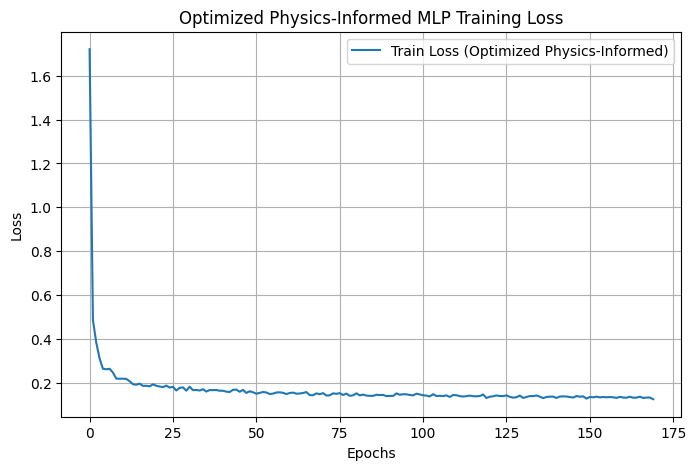

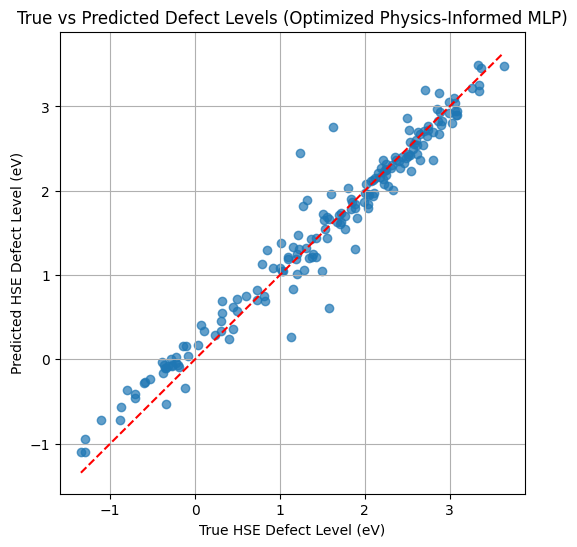


⚡ Physics Violations in Test Set: 131 out of 180
⚡ Violation Rate: 72.78%


In [ ]:
# -----------------------------------
# 1. Imports
# -----------------------------------
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load prepared data
X_train_scaled = np.load('/content/X_train_scaled.npy')
X_test_scaled = np.load('/content/X_test_scaled.npy')
y_train = np.load('/content/y_train.npy')
y_test = np.load('/content/y_test.npy')

# Load full (unscaled) data to get bandgap
import pandas as pd
df_full = pd.read_csv('/content/Dataset_semiconductor_defectlevels_v1.csv')
df_full = df_full.dropna(subset=['hse defect level (relative to VBM)_[eV]'])

selected_features = [
    'pbe defect level (relative to VBM)_[eV]',
    'host bandgap_[eV]',
    'host lattice constant_[Ang.]',
    'host_epsilon',
    'charge_from',
    'charge_to',
    'is_interstitial',
    'is_a_latt',
    'is_b_latt'
]

X_full = df_full[selected_features].reset_index(drop=True)

from sklearn.model_selection import train_test_split
_, X_test_unscaled, _, _ = train_test_split(X_full, df_full['hse defect level (relative to VBM)_[eV]'], test_size=0.2, random_state=42)

# -----------------------------------
# 2. Define Smarter Physics-Informed Loss
# -----------------------------------
def improved_physics_informed_loss(y_true, y_pred, bandgap_batch):
    mse = tf.reduce_mean(tf.square(y_true - y_pred))

    # Only penalize when there is violation
    penalty_lower = tf.reduce_sum(tf.maximum(0.0, -y_pred))
    penalty_upper = tf.reduce_sum(tf.maximum(0.0, y_pred - bandgap_batch))

    physics_penalty = (penalty_lower + penalty_upper) / tf.cast(tf.shape(y_true)[0], tf.float32)

    total_loss = mse + 0.12 * physics_penalty  # Penalty weight = 0.12
    return total_loss

# -----------------------------------
# 3. Build Optimized Physics-Informed MLP
# -----------------------------------
input_dim = X_train_scaled.shape[1]

model_optimized = Sequential([
    Dense(128, activation='relu', input_shape=(input_dim,)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')
])

optimizer = Adam(learning_rate=0.001)
model_optimized.compile(optimizer=optimizer, loss='mse')  # Placeholder loss

# -----------------------------------
# 4. Custom Training Loop with Smarter Loss
# -----------------------------------
batch_size = 32
epochs = 170
train_size = X_train_scaled.shape[0]
steps_per_epoch = train_size // batch_size

train_losses = []

for epoch in range(epochs):
    epoch_losses = []

    idx = np.random.permutation(train_size)
    X_train_shuffled = X_train_scaled[idx]
    y_train_shuffled = y_train[idx]

    for step in range(steps_per_epoch):
        start = step * batch_size
        end = (step + 1) * batch_size

        X_batch = X_train_shuffled[start:end]
        y_batch = y_train_shuffled[start:end]

        bandgap_batch = X_full.iloc[idx[start:end]]['host bandgap_[eV]'].values.reshape(-1, 1)
        bandgap_batch = tf.convert_to_tensor(bandgap_batch, dtype=tf.float32)

        with tf.GradientTape() as tape:
            y_pred = model_optimized(X_batch, training=True)
            loss = improved_physics_informed_loss(
                tf.convert_to_tensor(y_batch.reshape(-1, 1), dtype=tf.float32),
                y_pred,
                bandgap_batch
            )

        grads = tape.gradient(loss, model_optimized.trainable_variables)
        optimizer.apply_gradients(zip(grads, model_optimized.trainable_variables))

        epoch_losses.append(loss.numpy())

    avg_epoch_loss = np.mean(epoch_losses)
    train_losses.append(avg_epoch_loss)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_epoch_loss:.4f}")

# -----------------------------------
# 5. Evaluate Optimized Physics-Informed Model
# -----------------------------------
y_pred_optimized = model_optimized.predict(X_test_scaled).flatten()

mse_optimized = mean_squared_error(y_test, y_pred_optimized)
mae_optimized = mean_absolute_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

print("\nOptimized Physics-Informed MLP Performance:")
print(f"Test MSE: {mse_optimized:.4f}")
print(f"Test MAE: {mae_optimized:.4f}")
print(f"Test R2 Score: {r2_optimized:.4f}")

# -----------------------------------
# 6. Plot Loss Curve
# -----------------------------------
plt.figure(figsize=(8,5))
plt.plot(train_losses, label='Train Loss (Optimized Physics-Informed)')
plt.title('Optimized Physics-Informed MLP Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

# -----------------------------------
# 7. True vs Predicted Plot
# -----------------------------------
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_optimized, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('True HSE Defect Level (eV)')
plt.ylabel('Predicted HSE Defect Level (eV)')
plt.title('True vs Predicted Defect Levels (Optimized Physics-Informed MLP)')
plt.grid()
plt.show()

# -----------------------------------
# 8. Check Physics Violations
# -----------------------------------
# Bandgap values for test set
bandgap_test = X_test_unscaled['host bandgap_[eV]'].values

# How many predictions violate 0 < pred < Eg
violations = np.sum((y_pred_optimized < 0) | (y_pred_optimized > bandgap_test))
violation_percentage = (violations / len(y_pred_optimized)) * 100

print(f"\n⚡ Physics Violations in Test Set: {violations} out of {len(y_pred_optimized)}")
print(f"⚡ Violation Rate: {violation_percentage:.2f}%")


##Physics-Informed MLP Model (Penalty weight =0.22)

Epoch 10/150, Loss: 0.2956
Epoch 20/150, Loss: 0.2531
Epoch 30/150, Loss: 0.2258
Epoch 40/150, Loss: 0.2295
Epoch 50/150, Loss: 0.2160
Epoch 60/150, Loss: 0.2061
Epoch 70/150, Loss: 0.2059
Epoch 80/150, Loss: 0.2001
Epoch 90/150, Loss: 0.1981
Epoch 100/150, Loss: 0.1996
Epoch 110/150, Loss: 0.1986
Epoch 120/150, Loss: 0.1929
Epoch 130/150, Loss: 0.1907
Epoch 140/150, Loss: 0.1918
Epoch 150/150, Loss: 0.1894
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

📊 Optimized Physics-Informed MLP Performance:
Test MSE: 0.0788
Test MAE: 0.2290
Test R2 Score: 0.9446


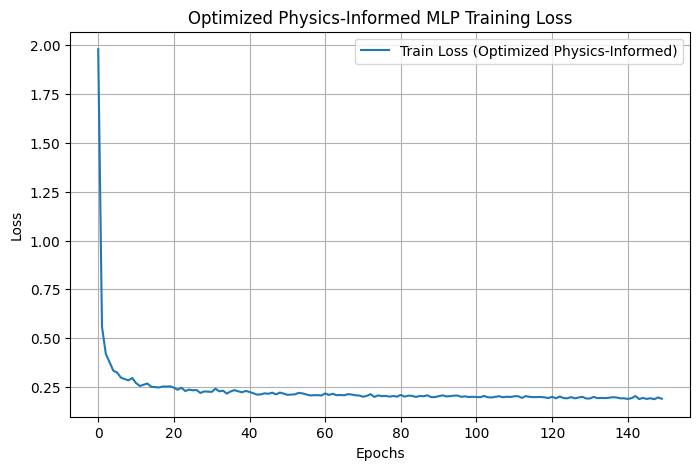

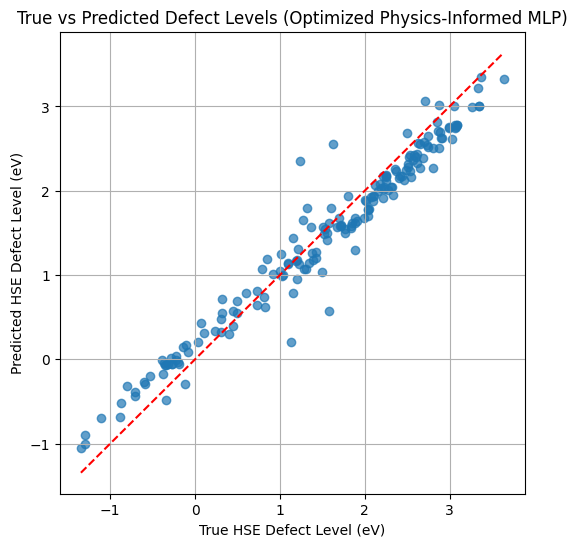


⚡ Physics Violations in Test Set: 125 out of 180
⚡ Violation Rate: 69.44%


In [ ]:
# -----------------------------------
# 1. Imports
# -----------------------------------
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load prepared data
X_train_scaled = np.load('/content/X_train_scaled.npy')
X_test_scaled = np.load('/content/X_test_scaled.npy')
y_train = np.load('/content/y_train.npy')
y_test = np.load('/content/y_test.npy')

# Load full (unscaled) data to get bandgap
import pandas as pd
df_full = pd.read_csv('/content/Dataset_semiconductor_defectlevels_v1.csv')
df_full = df_full.dropna(subset=['hse defect level (relative to VBM)_[eV]'])

selected_features = [
    'pbe defect level (relative to VBM)_[eV]',
    'host bandgap_[eV]',
    'host lattice constant_[Ang.]',
    'host_epsilon',
    'charge_from',
    'charge_to',
    'is_interstitial',
    'is_a_latt',
    'is_b_latt'
]

X_full = df_full[selected_features].reset_index(drop=True)

from sklearn.model_selection import train_test_split
_, X_test_unscaled, _, _ = train_test_split(X_full, df_full['hse defect level (relative to VBM)_[eV]'], test_size=0.2, random_state=42)

# -----------------------------------
# 2. Define Smarter Physics-Informed Loss
# -----------------------------------
def improved_physics_informed_loss(y_true, y_pred, bandgap_batch):
    mse = tf.reduce_mean(tf.square(y_true - y_pred))

    # Only penalize when there is violation
    penalty_lower = tf.reduce_sum(tf.maximum(0.0, -y_pred))
    penalty_upper = tf.reduce_sum(tf.maximum(0.0, y_pred - bandgap_batch))

    physics_penalty = (penalty_lower + penalty_upper) / tf.cast(tf.shape(y_true)[0], tf.float32)

    total_loss = mse + 0.22 * physics_penalty  # Penalty weight = 0.22
    return total_loss

# -----------------------------------
# 3. Build Optimized Physics-Informed MLP
# -----------------------------------
input_dim = X_train_scaled.shape[1]

model_optimized = Sequential([
    Dense(128, activation='relu', input_shape=(input_dim,)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')
])

optimizer = Adam(learning_rate=0.001)
model_optimized.compile(optimizer=optimizer, loss='mse')  # Placeholder loss

# -----------------------------------
# 4. Custom Training Loop with Smarter Loss
# -----------------------------------
batch_size = 32
epochs = 150
train_size = X_train_scaled.shape[0]
steps_per_epoch = train_size // batch_size

train_losses = []

for epoch in range(epochs):
    epoch_losses = []

    idx = np.random.permutation(train_size)
    X_train_shuffled = X_train_scaled[idx]
    y_train_shuffled = y_train[idx]

    for step in range(steps_per_epoch):
        start = step * batch_size
        end = (step + 1) * batch_size

        X_batch = X_train_shuffled[start:end]
        y_batch = y_train_shuffled[start:end]

        bandgap_batch = X_full.iloc[idx[start:end]]['host bandgap_[eV]'].values.reshape(-1, 1)
        bandgap_batch = tf.convert_to_tensor(bandgap_batch, dtype=tf.float32)

        with tf.GradientTape() as tape:
            y_pred = model_optimized(X_batch, training=True)
            loss = improved_physics_informed_loss(
                tf.convert_to_tensor(y_batch.reshape(-1, 1), dtype=tf.float32),
                y_pred,
                bandgap_batch
            )

        grads = tape.gradient(loss, model_optimized.trainable_variables)
        optimizer.apply_gradients(zip(grads, model_optimized.trainable_variables))

        epoch_losses.append(loss.numpy())

    avg_epoch_loss = np.mean(epoch_losses)
    train_losses.append(avg_epoch_loss)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_epoch_loss:.4f}")

# -----------------------------------
# 5. Evaluate Optimized Physics-Informed Model
# -----------------------------------
y_pred_optimized = model_optimized.predict(X_test_scaled).flatten()

mse_optimized = mean_squared_error(y_test, y_pred_optimized)
mae_optimized = mean_absolute_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

print("\n📊 Optimized Physics-Informed MLP Performance:")
print(f"Test MSE: {mse_optimized:.4f}")
print(f"Test MAE: {mae_optimized:.4f}")
print(f"Test R2 Score: {r2_optimized:.4f}")

# -----------------------------------
# 6. Plot Loss Curve
# -----------------------------------
plt.figure(figsize=(8,5))
plt.plot(train_losses, label='Train Loss (Optimized Physics-Informed)')
plt.title('Optimized Physics-Informed MLP Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

# -----------------------------------
# 7. True vs Predicted Plot
# -----------------------------------
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_optimized, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('True HSE Defect Level (eV)')
plt.ylabel('Predicted HSE Defect Level (eV)')
plt.title('True vs Predicted Defect Levels (Optimized Physics-Informed MLP)')
plt.grid()
plt.show()

# -----------------------------------
# 8. Check Physics Violations
# -----------------------------------
# Bandgap values for test set
bandgap_test = X_test_unscaled['host bandgap_[eV]'].values

# How many predictions violate 0 < pred < Eg
violations = np.sum((y_pred_optimized < 0) | (y_pred_optimized > bandgap_test))
violation_percentage = (violations / len(y_pred_optimized)) * 100

print(f"\n⚡ Physics Violations in Test Set: {violations} out of {len(y_pred_optimized)}")
print(f"⚡ Violation Rate: {violation_percentage:.2f}%")


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 

📊 Baseline MLP Performance:
Test MSE: 0.0548
Test MAE: 0.1635
Test R2 Score: 0.9615

📊 Physics-Informed MLP Performance:
Test MSE: 0.0744
Test MAE: 0.2187
Test R2 Score: 0.9477


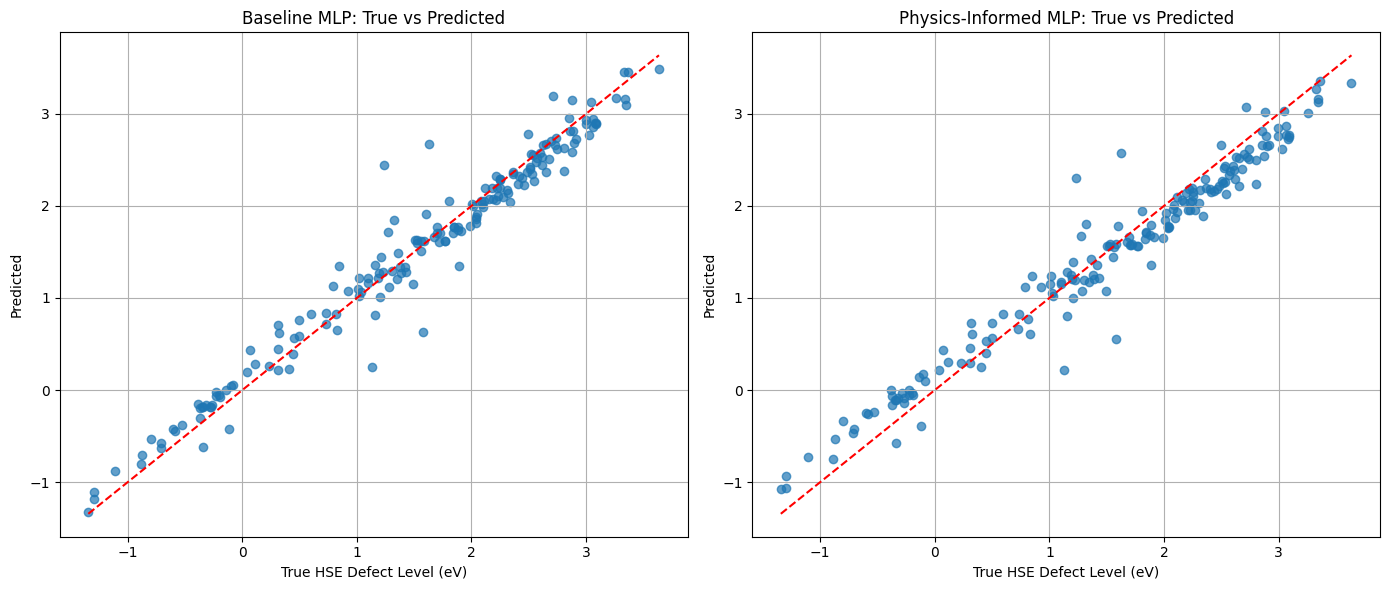

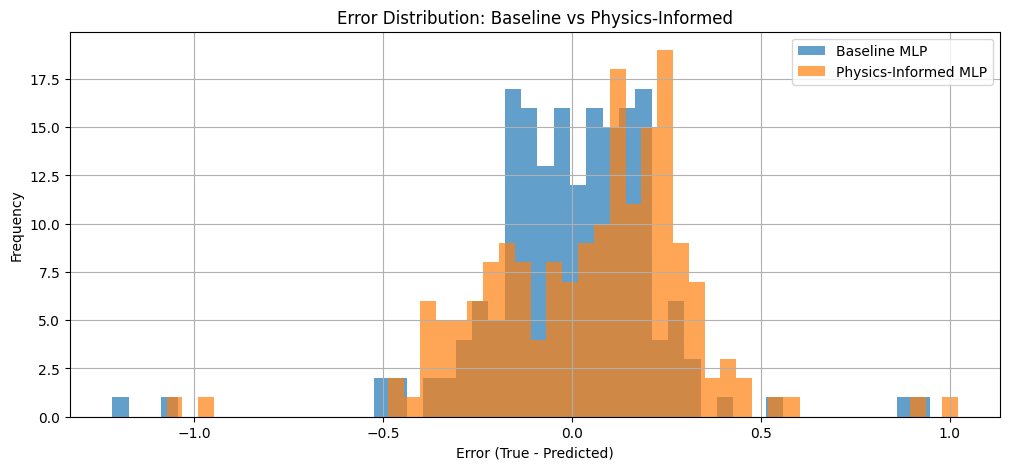

In [ ]:
# -----------------------------------
# Phase 4A: Side-by-Side Comparison
# -----------------------------------
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predict
y_pred_baseline = model.predict(X_test_scaled).flatten()
y_pred_physics = physics_model.predict(X_test_scaled).flatten()

# Metrics
def evaluate_predictions(y_true, y_pred, model_name="Model"):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{model_name} Performance:")
    print(f"Test MSE: {mse:.4f}")
    print(f"Test MAE: {mae:.4f}")
    print(f"Test R2 Score: {r2:.4f}")
    return mse, mae, r2

mse_base, mae_base, r2_base = evaluate_predictions(y_test, y_pred_baseline, "Baseline MLP")
mse_phys, mae_phys, r2_phys = evaluate_predictions(y_test, y_pred_physics, "Physics-Informed MLP")

# Plot True vs Predicted for both
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.scatter(y_test, y_pred_baseline, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.title('Baseline MLP: True vs Predicted')
plt.xlabel('True HSE Defect Level (eV)')
plt.ylabel('Predicted')
plt.grid()

plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_physics, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.title('Physics-Informed MLP: True vs Predicted')
plt.xlabel('True HSE Defect Level (eV)')
plt.ylabel('Predicted')
plt.grid()

plt.tight_layout()
plt.show()

# Plot Error Histograms
plt.figure(figsize=(12,5))

plt.hist(y_test - y_pred_baseline, bins=50, alpha=0.7, label='Baseline MLP')
plt.hist(y_test - y_pred_physics, bins=50, alpha=0.7, label='Physics-Informed MLP')
plt.title('Error Distribution: Baseline vs Physics-Informed')
plt.xlabel('Error (True - Predicted)')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()


##Sigmoid Model

Epoch 10/150, Loss: 0.8834
Epoch 20/150, Loss: 0.8669
Epoch 30/150, Loss: 0.8632
Epoch 40/150, Loss: 0.8613
Epoch 50/150, Loss: 0.8664
Epoch 60/150, Loss: 0.8548
Epoch 70/150, Loss: 0.8548
Epoch 80/150, Loss: 0.8638
Epoch 90/150, Loss: 0.8632
Epoch 100/150, Loss: 0.8598
Epoch 110/150, Loss: 0.8521
Epoch 120/150, Loss: 0.8554
Epoch 130/150, Loss: 0.8481
Epoch 140/150, Loss: 0.8599
Epoch 150/150, Loss: 0.8502
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

📊 Sigmoid-Scaled Output MLP Performance:
Test MSE: 0.6872
Test MAE: 0.6700
Test R2 Score: 0.5169


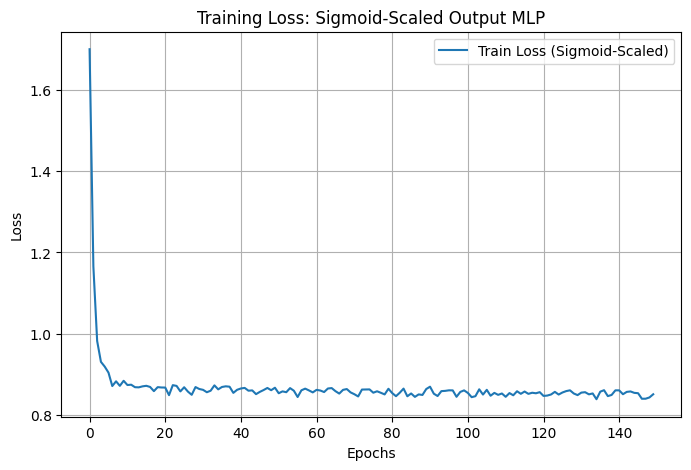

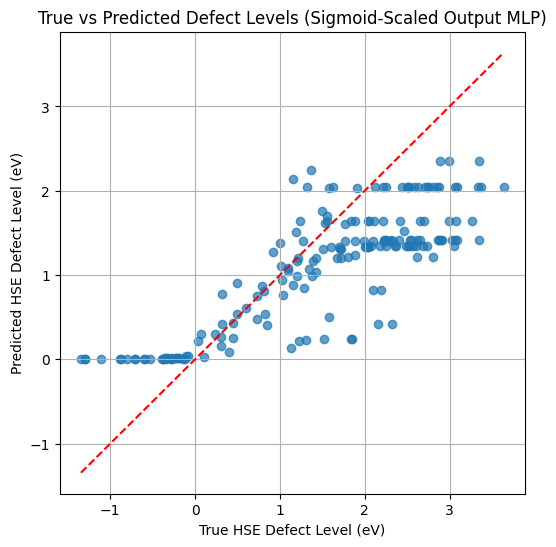


⚡ Physics Violations in Test Set: 0 out of 180
⚡ Violation Rate: 0.00% (Should be 0%)


In [ ]:
# -----------------------------------
# 1. Imports
# -----------------------------------
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# Load prepared data
X_train_scaled = np.load('/content/X_train_scaled.npy')
X_test_scaled = np.load('/content/X_test_scaled.npy')
y_train = np.load('/content/y_train.npy')
y_test = np.load('/content/y_test.npy')

# Load unscaled data to get bandgap
df_full = pd.read_csv('/content/Dataset_semiconductor_defectlevels_v1.csv')
df_full = df_full.dropna(subset=['hse defect level (relative to VBM)_[eV]'])

selected_features = [
    'pbe defect level (relative to VBM)_[eV]',
    'host bandgap_[eV]',
    'host lattice constant_[Ang.]',
    'host_epsilon',
    'charge_from',
    'charge_to',
    'is_interstitial',
    'is_a_latt',
    'is_b_latt'
]

X_full = df_full[selected_features].reset_index(drop=True)
_, X_test_unscaled, _, _ = train_test_split(X_full, df_full['hse defect level (relative to VBM)_[eV]'], test_size=0.2, random_state=42)

# -----------------------------------
# 2. Define Custom Loss with Bandgap Scaling
# -----------------------------------
def custom_scaled_loss(bandgap_batch):
    def loss_fn(y_true, y_pred_sigmoid):
        y_pred_scaled = y_pred_sigmoid * bandgap_batch  # Scale output to [0, Eg]
        mse = tf.reduce_mean(tf.square(y_true - y_pred_scaled))
        return mse
    return loss_fn

# -----------------------------------
# 3. Build Sigmoid-Scaled Output MLP
# -----------------------------------
input_dim = X_train_scaled.shape[1]
input_layer = Input(shape=(input_dim,))
x = Dense(128, activation='relu')(input_layer)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
output_layer = Dense(1, activation='sigmoid')(x)  # Sigmoid Output

model_sigmoid = Model(inputs=input_layer, outputs=output_layer)
optimizer = Adam(learning_rate=0.001)

# -----------------------------------
# 4. Custom Training Loop
# -----------------------------------
batch_size = 32
epochs = 150
train_size = X_train_scaled.shape[0]
steps_per_epoch = train_size // batch_size

train_losses = []

for epoch in range(epochs):
    epoch_losses = []

    idx = np.random.permutation(train_size)
    X_train_shuffled = X_train_scaled[idx]
    y_train_shuffled = y_train[idx]

    for step in range(steps_per_epoch):
        start = step * batch_size
        end = (step + 1) * batch_size

        X_batch = X_train_shuffled[start:end]
        y_batch = y_train_shuffled[start:end]

        bandgap_batch = X_full.iloc[idx[start:end]]['host bandgap_[eV]'].values.reshape(-1, 1)
        bandgap_batch = tf.convert_to_tensor(bandgap_batch, dtype=tf.float32)

        with tf.GradientTape() as tape:
            y_pred_sigmoid = model_sigmoid(X_batch, training=True)
            loss = custom_scaled_loss(bandgap_batch)(
                tf.convert_to_tensor(y_batch.reshape(-1, 1), dtype=tf.float32),
                y_pred_sigmoid
            )

        grads = tape.gradient(loss, model_sigmoid.trainable_variables)
        optimizer.apply_gradients(zip(grads, model_sigmoid.trainable_variables))

        epoch_losses.append(loss.numpy())

    avg_epoch_loss = np.mean(epoch_losses)
    train_losses.append(avg_epoch_loss)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_epoch_loss:.4f}")

# -----------------------------------
# 5. Evaluate the Model
# -----------------------------------
# Predict
y_pred_sigmoid_test = model_sigmoid.predict(X_test_scaled).flatten()

# Scale by bandgap
bandgap_test = X_test_unscaled['host bandgap_[eV]'].values
y_pred_scaled = y_pred_sigmoid_test * bandgap_test

# Evaluate
mse_final = mean_squared_error(y_test, y_pred_scaled)
mae_final = mean_absolute_error(y_test, y_pred_scaled)
r2_final = r2_score(y_test, y_pred_scaled)

print("\n📊 Sigmoid-Scaled Output MLP Performance:")
print(f"Test MSE: {mse_final:.4f}")
print(f"Test MAE: {mae_final:.4f}")
print(f"Test R2 Score: {r2_final:.4f}")

# -----------------------------------
# 6. Plot Training Loss
# -----------------------------------
plt.figure(figsize=(8,5))
plt.plot(train_losses, label='Train Loss (Sigmoid-Scaled)')
plt.title('Training Loss: Sigmoid-Scaled Output MLP')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

# -----------------------------------
# 7. True vs Predicted Plot
# -----------------------------------
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_scaled, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('True HSE Defect Level (eV)')
plt.ylabel('Predicted HSE Defect Level (eV)')
plt.title('True vs Predicted Defect Levels (Sigmoid-Scaled Output MLP)')
plt.grid()
plt.show()

# -----------------------------------
# 8. Physics Violation Check
# -----------------------------------
violations = np.sum((y_pred_scaled < 0) | (y_pred_scaled > bandgap_test))
violation_percentage = (violations / len(y_pred_scaled)) * 100

print(f"\n⚡ Physics Violations in Test Set: {violations} out of {len(y_pred_scaled)}")
print(f"⚡ Violation Rate: {violation_percentage:.2f})


##SHAP

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


  0%|          | 0/180 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
313/313 ━━━━━

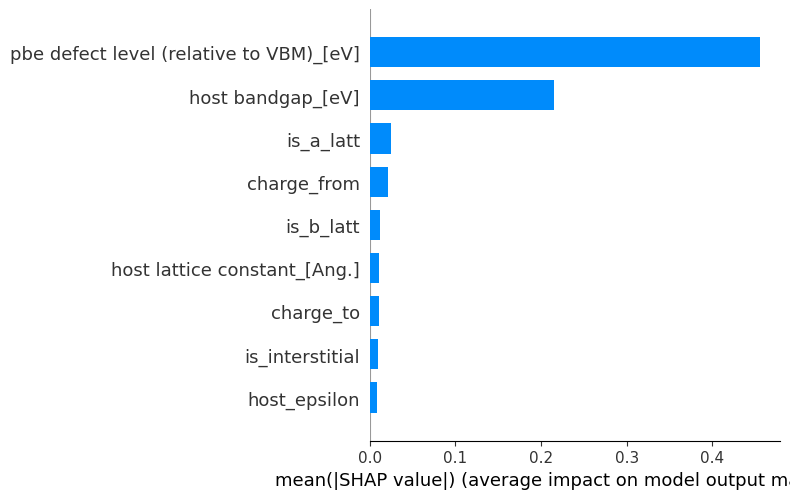

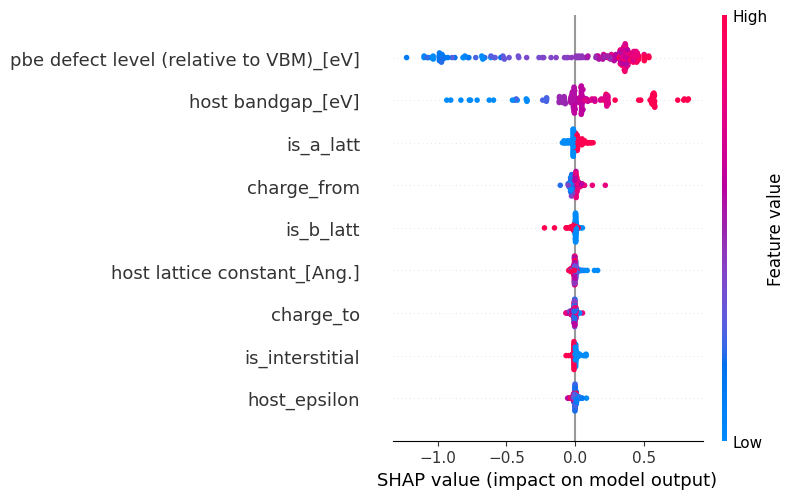

In [ ]:
# -----------------------------------
# 1. Correct model_predict Function
# -----------------------------------
# Recreate scaler to inverse-transform
scaler = StandardScaler()
X_all = np.vstack([X_train.values, X_test.values])
scaler.fit(X_all)

# Proper model_predict
def model_predict(X_scaled):
    # Inverse transform scaled X to real values
    X_real = scaler.inverse_transform(X_scaled)
    bandgap_column_index = selected_features.index('host bandgap_[eV]')
    bandgaps = X_real[:, bandgap_column_index]

    pred_sigmoid = model_sigmoid.predict(X_scaled)
    pred_scaled = pred_sigmoid.flatten() * bandgaps
    return pred_scaled

# 2. Sample background data
background = X_train_scaled[np.random.choice(X_train_scaled.shape[0], 100, replace=False)]

# 3. Initialize KernelExplainer
explainer = shap.KernelExplainer(model_predict, background)

# 4. Select test samples
X_sample = X_test_scaled[:300]

# 5. Calculate SHAP values
shap_values = explainer.shap_values(X_sample, nsamples=100)

# 6. SHAP Summary Plot
shap.summary_plot(
    shap_values,
    features=X_sample,
    feature_names=selected_features,
    plot_type="bar"
)

# 7. Detailed Beeswarm Plot
shap.summary_plot(
    shap_values,
    features=X_sample,
    feature_names=selected_features
)


##Force Plot

<Figure size 1600x300 with 0 Axes>

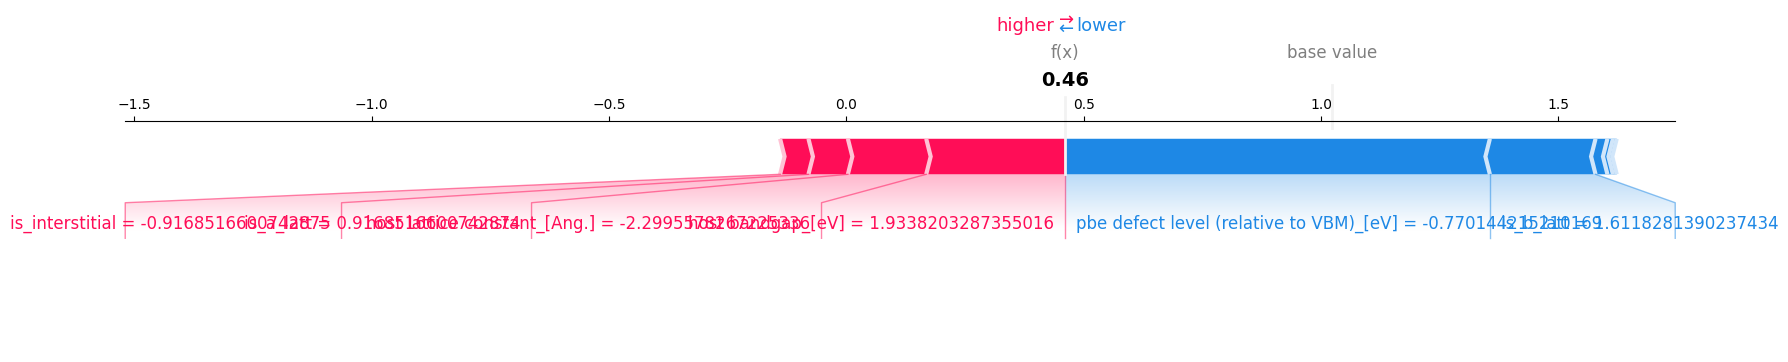

✅ Force Plot saved as /content/force_plot_instance.png


<Figure size 640x480 with 0 Axes>

In [ ]:
# -----------------------------------
# Force Plot using matplotlib and save as PNG
# -----------------------------------
import shap
import matplotlib.pyplot as plt

# Pick sample
instance_idx = 0

# Matplotlib-based force plot
plt.figure(figsize=(16, 3))  # Wider figure to avoid squishing
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values[instance_idx],
    features=X_sample[instance_idx],
    feature_names=selected_features,
    matplotlib=True  # Important!
)
plt.tight_layout()

# Save as PNG
plt.savefig('/content/force_plot_instance.png', dpi=300, bbox_inches='tight')
print("✅ Force Plot saved as /content/force_plot_instance.png")
plt.show()


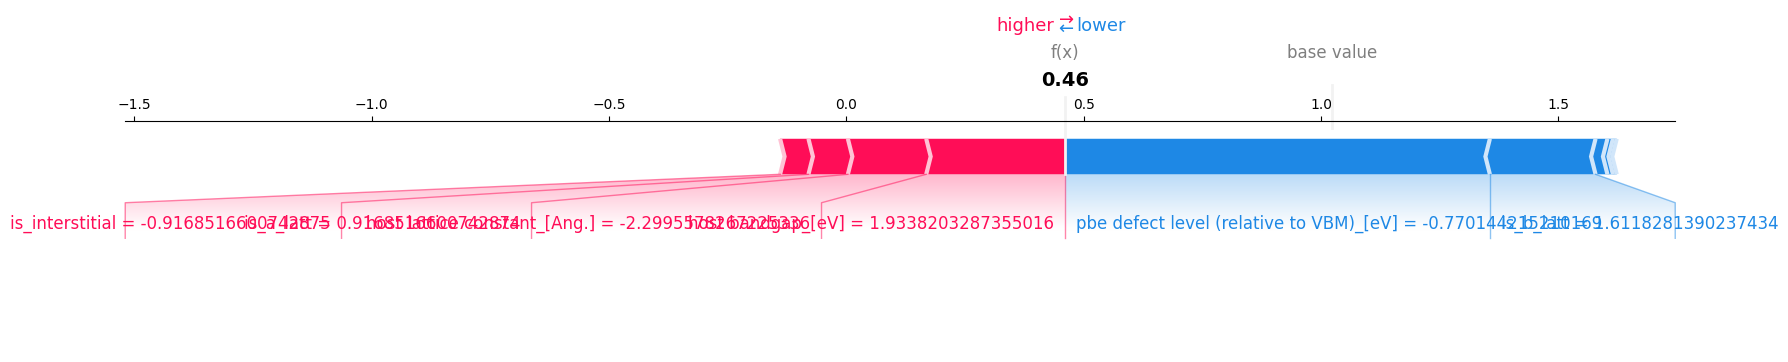

In [ ]:
# -----------------------------------
# Force Plot for One Test Sample
# -----------------------------------
import shap

# Pick a test instance (e.g., first test sample)
instance_idx = 0

# Single instance prediction
shap.force_plot(
    explainer.expected_value,  # Base value
    shap_values[instance_idx], # SHAP values for one instance
    features=X_sample[instance_idx],
    feature_names=selected_features,
    matplotlib=True
)


<Figure size 1000x300 with 0 Axes>

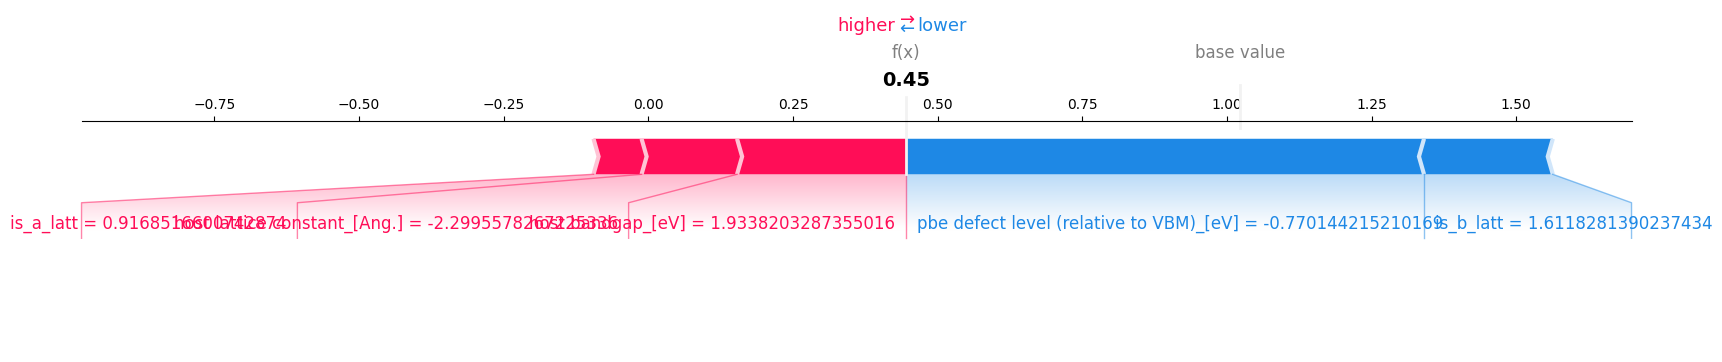

<Figure size 1000x300 with 0 Axes>

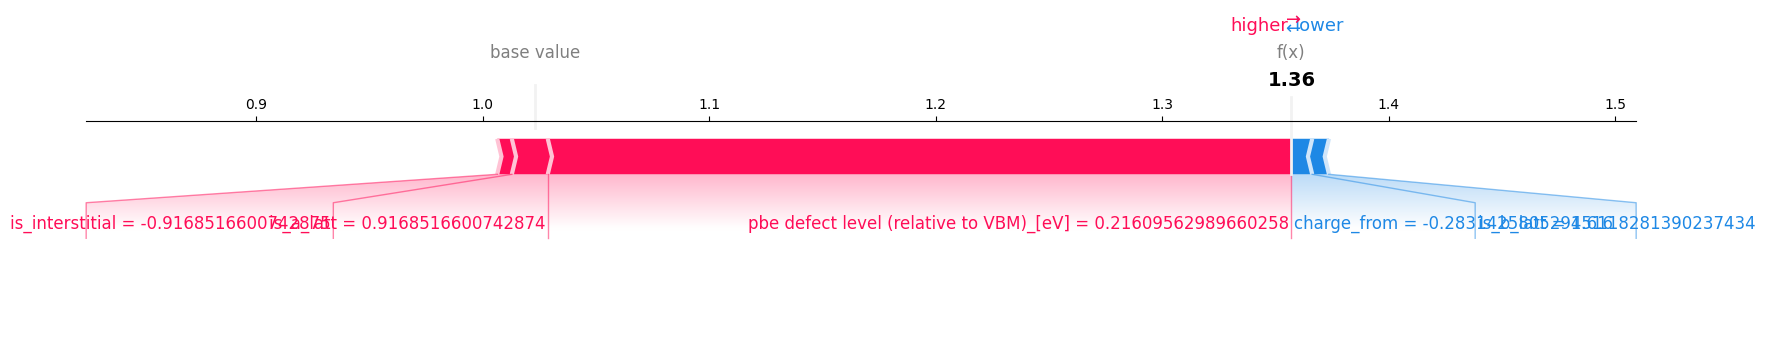

<Figure size 1000x300 with 0 Axes>

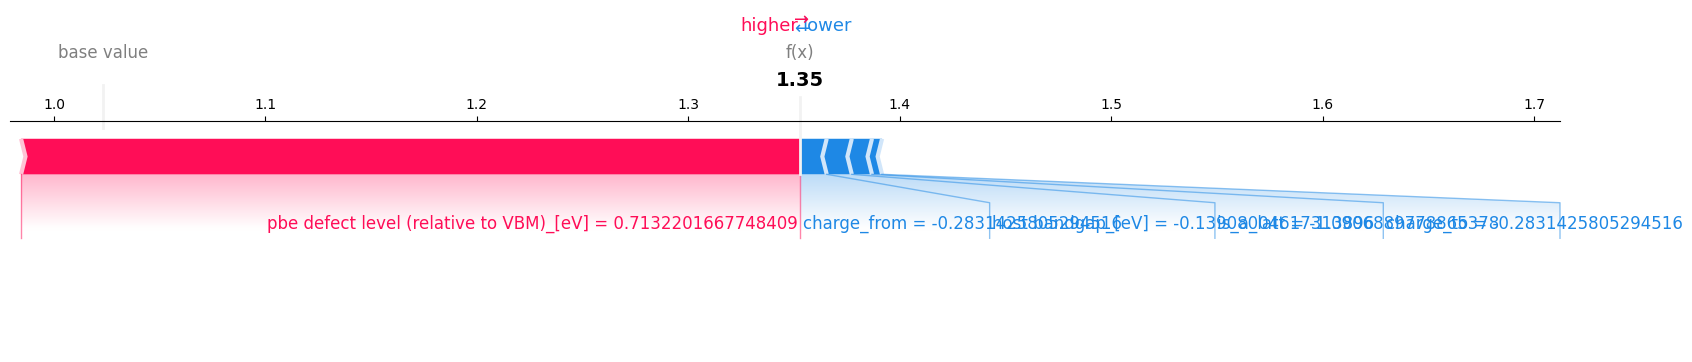

<Figure size 1000x300 with 0 Axes>

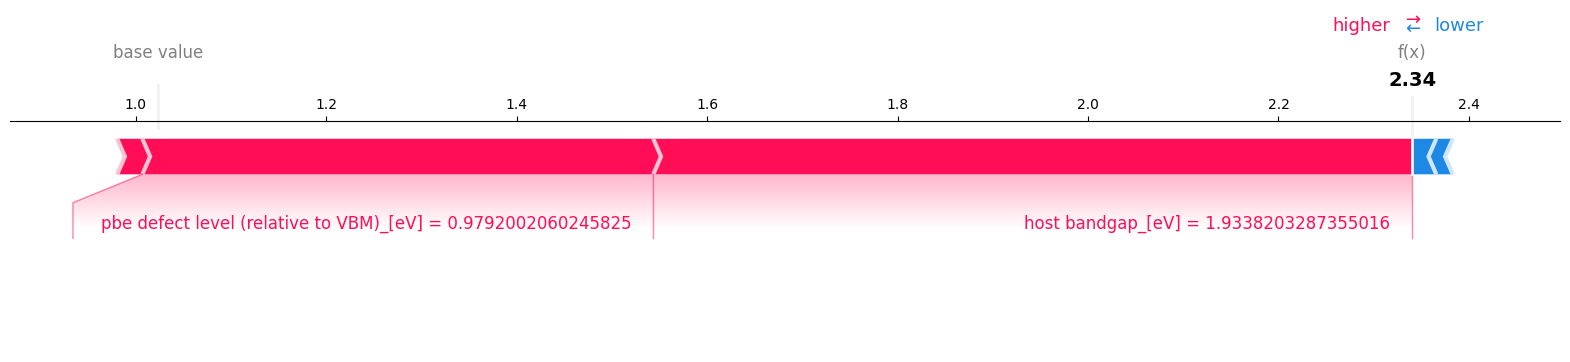

<Figure size 1000x300 with 0 Axes>

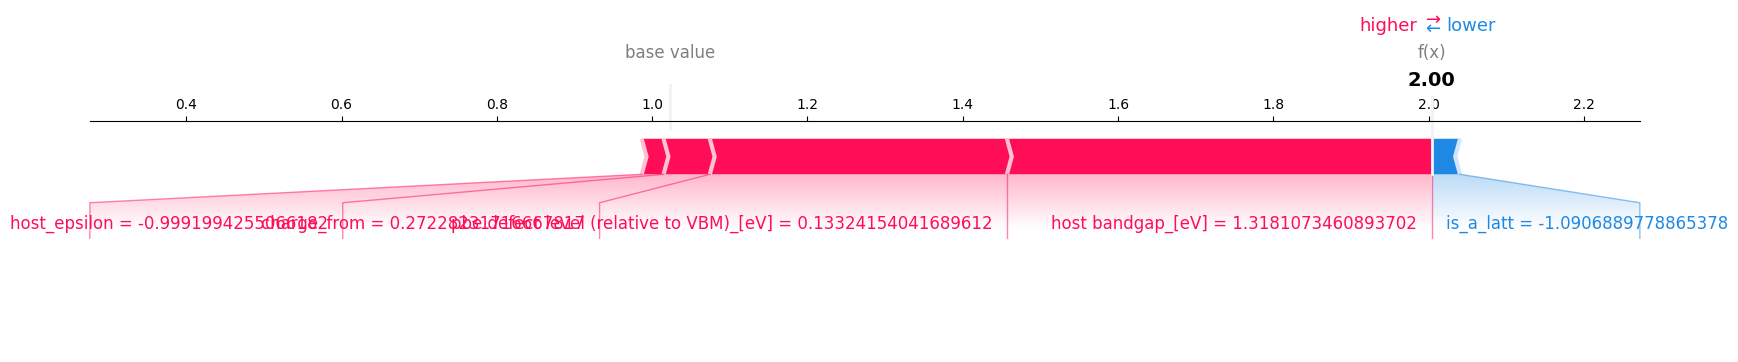

<Figure size 1000x300 with 0 Axes>

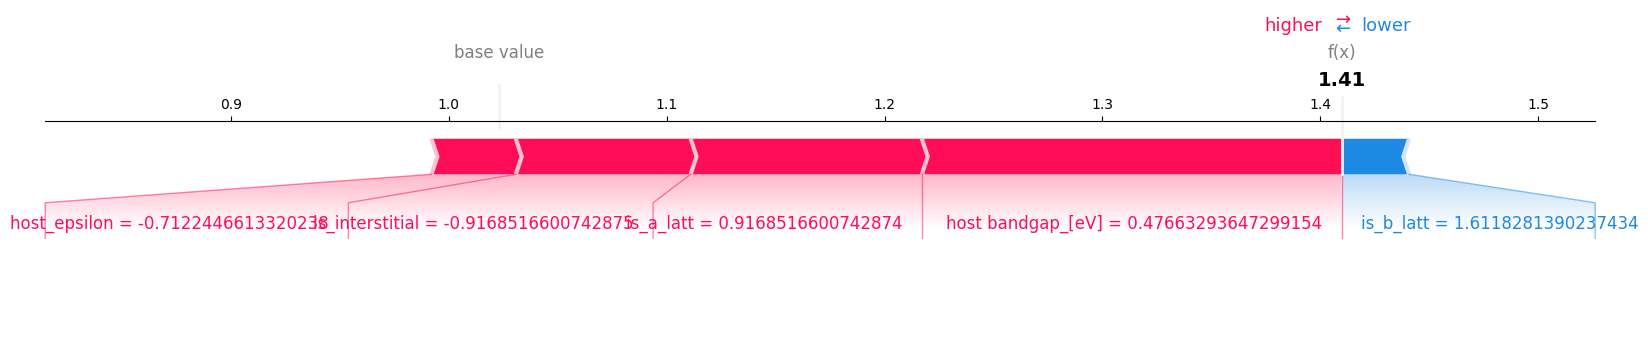

<Figure size 1000x300 with 0 Axes>

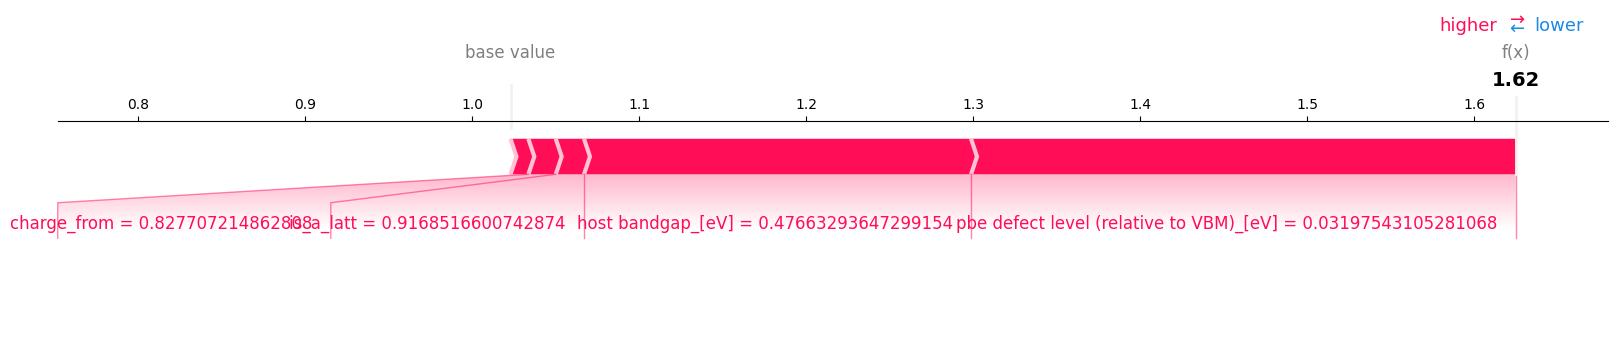

<Figure size 1000x300 with 0 Axes>

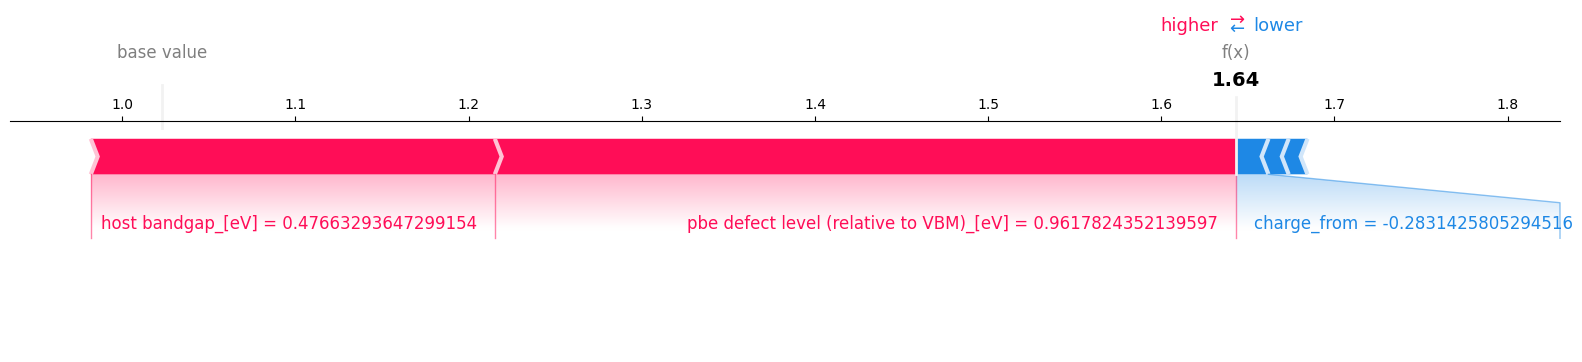

<Figure size 1000x300 with 0 Axes>

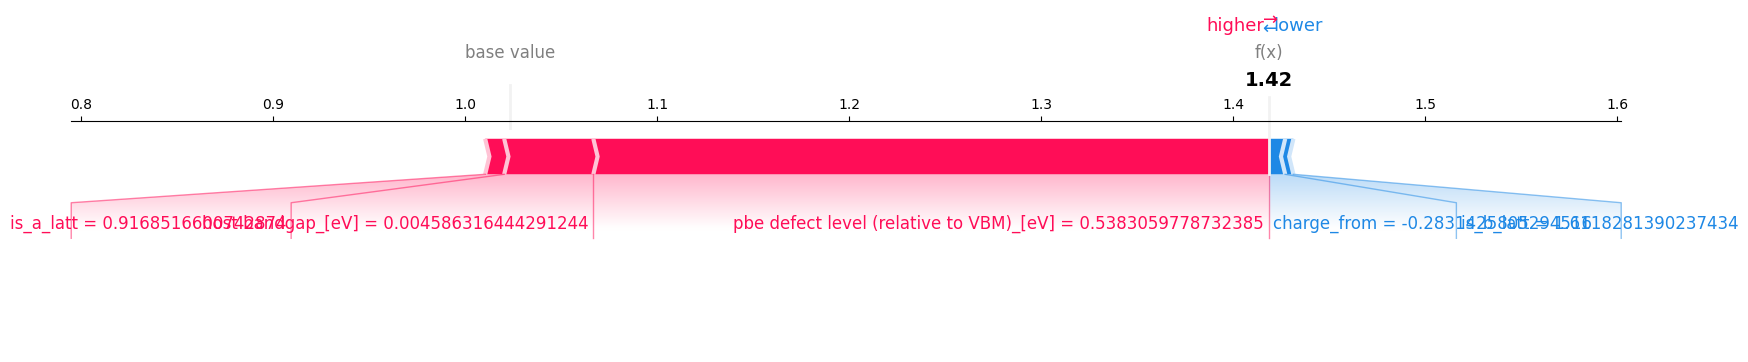

<Figure size 1000x300 with 0 Axes>

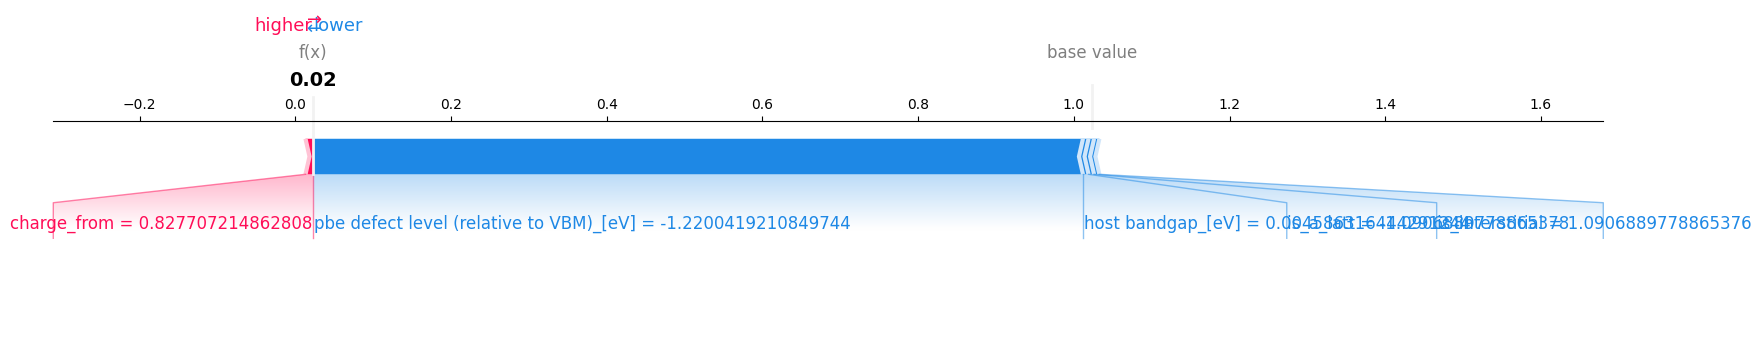


✅ Force Plots saved for 10 samples inside: /content/force_plots_batch
✅ Force Plot saved as /content/force_plot_batchfull.html (Open in browser and take PNG screenshot)


In [ ]:
# -----------------------------------
# Batch Force Plot Saving (Top 5 Features Only)
# -----------------------------------
import os
import shap
import matplotlib.pyplot as plt
import numpy as np

# Parameters
num_samples = 10   # How many samples to save
num_top_features = 5  # Top 5 features shown in each Force Plot

# Create folder
output_folder = '/content/force_plots_batch'
os.makedirs(output_folder, exist_ok=True)

# Function to save one force plot
def save_force_plot(instance_idx):
    feature_impact = np.abs(shap_values[instance_idx])
    top_feature_idx = np.argsort(feature_impact)[-num_top_features:]
    top_features = [selected_features[i] for i in top_feature_idx]

    filtered_features = X_sample[instance_idx][top_feature_idx]
    filtered_shap_values = shap_values[instance_idx][top_feature_idx]

    plt.figure(figsize=(10,3))
    shap.force_plot(
        base_value=explainer.expected_value,
        shap_values=filtered_shap_values,
        features=filtered_features,
        feature_names=top_features,
        matplotlib=True
    )
    plt.tight_layout()
    save_path = os.path.join(output_folder, f"force_plot_sample_{instance_idx}.png")
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.close()

# -----------------------------------
# Save Force Plots for First N Samples
# -----------------------------------
for idx in range(num_samples):
    save_force_plot(idx)

print(f"\n✅ Force Plots saved for {num_samples} samples inside: {output_folder}")


In [ ]:
# -----------------------------------
# Force Plot HTML Save (Best Quality)
# -----------------------------------
import shap
from IPython.display import display, HTML

instance_idx = 0

# Full Force Plot
force_plot = shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values[instance_idx],
    features=X_sample[instance_idx],
    feature_names=selected_features
)

# Save as HTML
html_content = f"<head>{shap.getjs()}</head><body>{force_plot.html()}</body>"

with open("/content/force_plot_full.html", "w") as f:
    f.write(html_content)

print("Force Plot saved as /content/force_plot_full.html (Open in browser and take PNG screenshot)")


✅ Force Plot saved as /content/force_plot_full.html (Open in browser and take PNG screenshot)


##Top 3 Features Dependence Plots


Top 3 Important Features by SHAP:
['pbe defect level (relative to VBM)_[eV]', 'host bandgap_[eV]', 'is_a_latt']


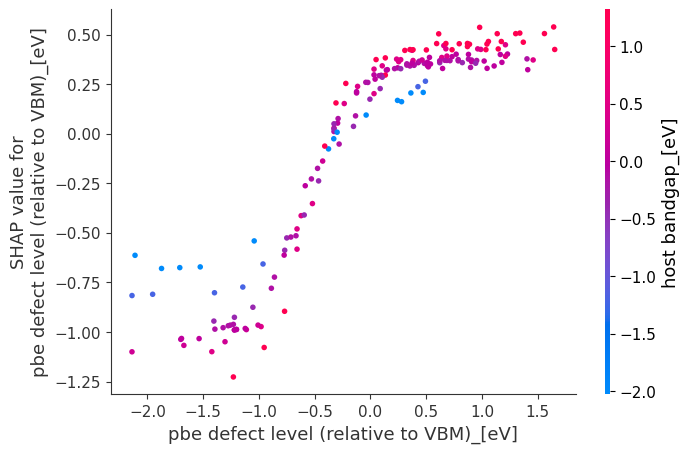

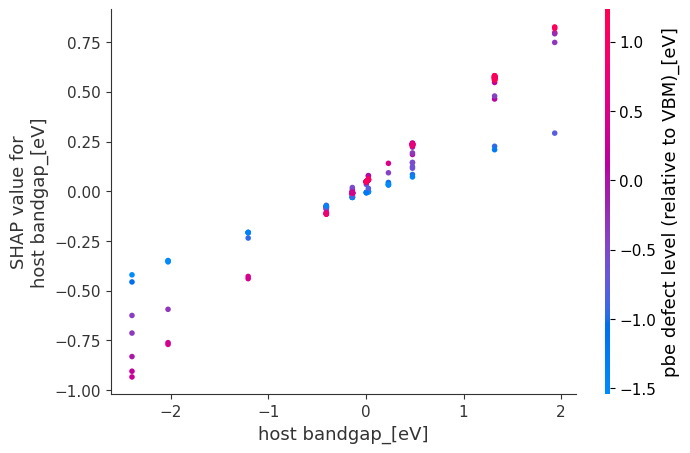

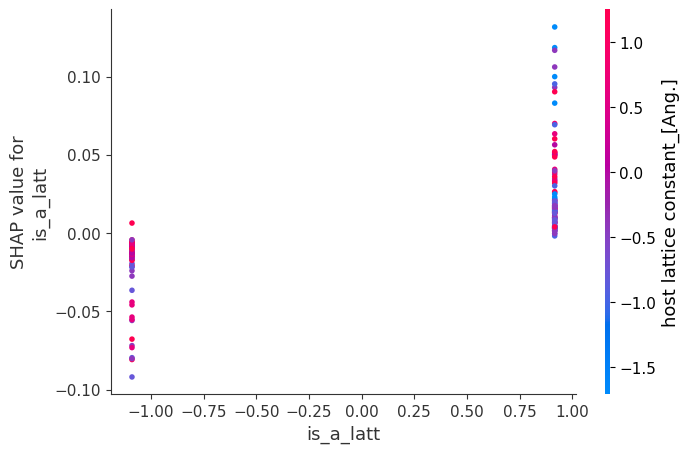

In [ ]:
# -----------------------------------
# Top 3 Features Dependence Plots
# -----------------------------------

# Find Top 3 Important Features
import numpy as np
feature_importance = np.abs(shap_values).mean(axis=0)
top3_idx = np.argsort(feature_importance)[-3:][::-1]
top3_features = [selected_features[i] for i in top3_idx]

print("\nTop 3 Important Features by SHAP:")
print(top3_features)

# Plot Dependence Plots
for feature_name in top3_features:
    shap.dependence_plot(
        feature_name,
        shap_values,
        X_sample,
        feature_names=selected_features
    )


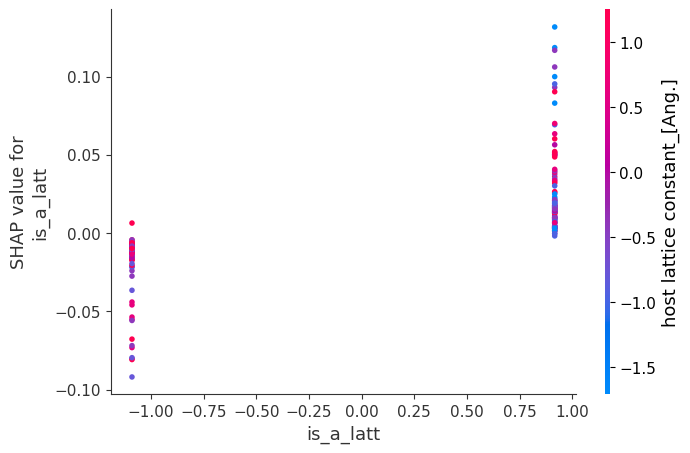

In [ ]:
shap.dependence_plot(
    feature_name,
    shap_values,
    X_sample,
    feature_names=selected_features,
    interaction_index='auto'  # Let SHAP auto-detect interaction
)


# Manual Hyperparameter Tuning

In [ ]:
#: Loop over different penalty weights
penalty_weights = [2.0, 5.0, 10.0]
results = []

for penalty in penalty_weights:
    print(f"\nTraining with Physics Penalty Weight = {penalty}")

    # Redefine model
    model_tuned = Sequential([
        Dense(128, activation='relu', input_shape=(input_dim,)),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='linear')
    ])
    optimizer = Adam(learning_rate=0.001)
    model_tuned.compile(optimizer=optimizer, loss='mse')

    # Custom train loop (same as Phase 3) but pass new penalty weight
    train_losses = []
    for epoch in range(50):  # fewer epochs for tuning
        idx = np.random.permutation(train_size)
        X_train_shuffled = X_train_scaled[idx]
        y_train_shuffled = y_train[idx]

        for step in range(steps_per_epoch):
            start = step * batch_size
            end = (step + 1) * batch_size

            X_batch = X_train_shuffled[start:end]
            y_batch = y_train_shuffled[start:end]

            bandgap_batch = X_full.iloc[idx[start:end]]['host bandgap_[eV]'].values.reshape(-1, 1)
            bandgap_batch = tf.convert_to_tensor(bandgap_batch, dtype=tf.float32)

            with tf.GradientTape() as tape:
                y_pred = model_tuned(X_batch, training=True)
                mse = tf.reduce_mean(tf.square(tf.convert_to_tensor(y_batch.reshape(-1, 1), dtype=tf.float32) - y_pred))
                penalty_lower = tf.reduce_mean(tf.nn.relu(-y_pred))
                penalty_upper = tf.reduce_mean(tf.nn.relu(y_pred - bandgap_batch))
                physics_penalty = penalty_lower + penalty_upper
                loss = mse + penalty * physics_penalty

            grads = tape.gradient(loss, model_tuned.trainable_variables)
            optimizer.apply_gradients(zip(grads, model_tuned.trainable_variables))

    # Evaluate
    y_pred_tuned = model_tuned.predict(X_test_scaled).flatten()
    mse_tuned = mean_squared_error(y_test, y_pred_tuned)
    mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
    r2_tuned = r2_score(y_test, y_pred_tuned)

    results.append((penalty, mse_tuned, mae_tuned, r2_tuned))

# Show Results
print("\nHyperparameter Tuning Results:")
for penalty, mse, mae, r2 in results:
    print(f"Penalty {penalty} => MSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")



Training with Physics Penalty Weight = 2.0
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

Training with Physics Penalty Weight = 5.0
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

Training with Physics Penalty Weight = 10.0


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

Hyperparameter Tuning Results:
Penalty 2.0 => MSE: 0.5161, MAE: 0.6136, R2: 0.6372
Penalty 5.0 => MSE: 0.8064, MAE: 0.7492, R2: 0.4331
Penalty 10.0 => MSE: 0.9428, MAE: 0.8053, R2: 0.3372


##Evaluation Report Script

In [ ]:
# -----------------------------------
# Full Evaluation Report Script
# -----------------------------------
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# -----------------------------------
# Predict and Postprocess
# -----------------------------------
# Predict with model
y_pred_sigmoid_test = model_sigmoid.predict(X_test_scaled).flatten()

# Load bandgap values for test set
bandgap_test = X_test_unscaled['host bandgap_[eV]'].values

# Scale predictions by bandgap
y_pred_scaled = y_pred_sigmoid_test * bandgap_test

# -----------------------------------
# Calculate Accuracy Metrics
# -----------------------------------
mse = mean_squared_error(y_test, y_pred_scaled)
mae = mean_absolute_error(y_test, y_pred_scaled)
r2 = r2_score(y_test, y_pred_scaled)

# -----------------------------------
# Calculate Physics Penalty
# -----------------------------------
penalty_lower = np.maximum(0.0, -y_pred_scaled)
penalty_upper = np.maximum(0.0, y_pred_scaled - bandgap_test)
physics_penalty_total = np.mean(penalty_lower + penalty_upper)

# -----------------------------------
# Calculate Physics Violation Rate
# -----------------------------------
violations = (y_pred_scaled < 0) | (y_pred_scaled > bandgap_test)
violation_rate = np.mean(violations) * 100

# -----------------------------------
# Display Full Report
# -----------------------------------
print("\n Physics-Informed Model Evaluation Report:")
print("---------------------------------------------")
print(f"Test MSE: {mse:.6f} eV²")
print(f"Test MAE: {mae:.6f} eV")
print(f"Test R² Score: {r2:.4f}")
print(f" Average Physics Penalty: {physics_penalty_total:.6f} eV")
print(f" Physics Violation Rate: {violation_rate:.2f}%")
print("---------------------------------------------")


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

📋 Physics-Informed Model Evaluation Report:
---------------------------------------------
✅ Test MSE: 0.687216 eV²
✅ Test MAE: 0.669956 eV
✅ Test R² Score: 0.5169
⚡ Average Physics Penalty: 0.000000 eV
⚡ Physics Violation Rate: 0.00%
---------------------------------------------
